In [ ]:
# By Mehdi Ammi, Univ. Paris 8

# From Self-Attention mechanism to Transformers

This notebook aims to provide a comprehensive and practical understanding of the self-attention mechanism and its applications in various contexts, through detailed explanations, visualizations and interactive exercises.

## Self-Attention mechanism: basic implementation

Here is an example of Python code using TensorFlow and Matplotlib to explain and visualize the Self-Attention mechanism. This code shows intermediate steps such as generating queries, keys, and values ​​matrices, as well as calculating attention scores and applying attention weights to values. .

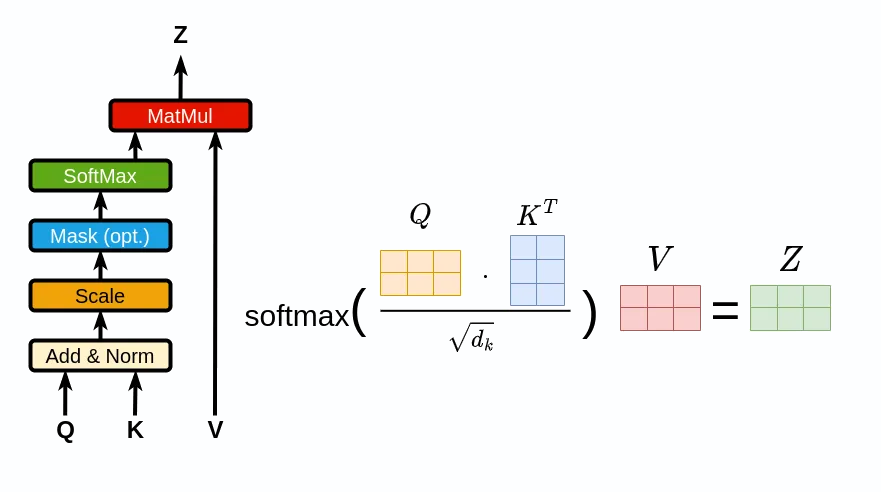

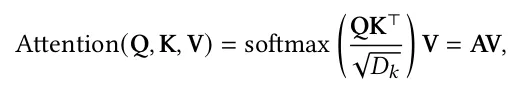

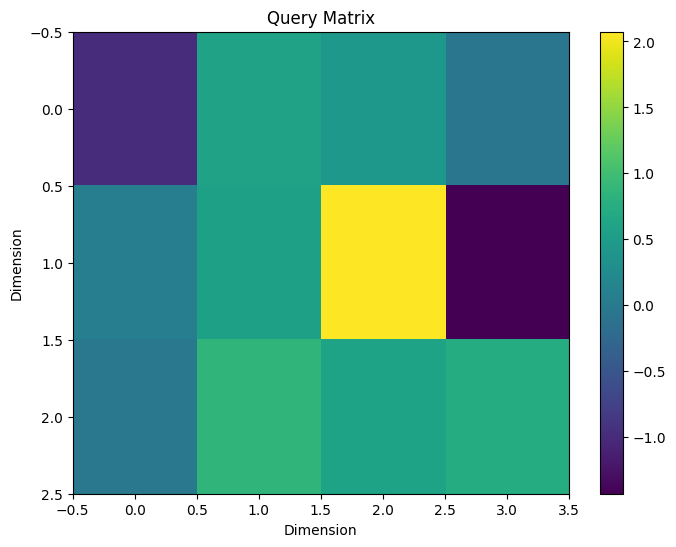

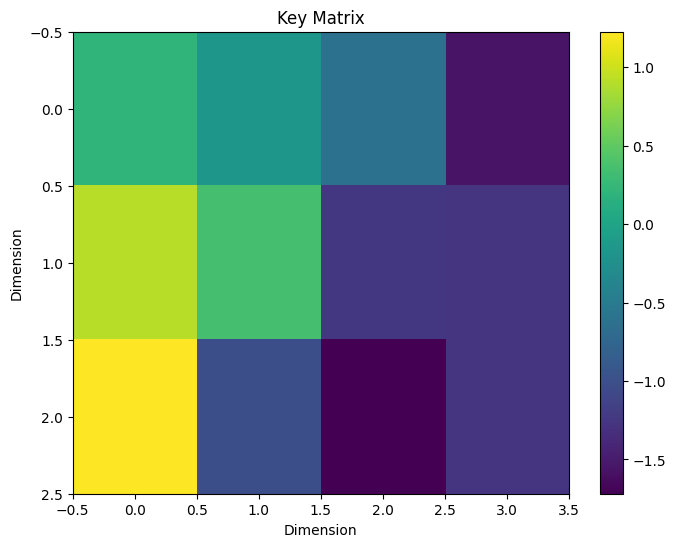

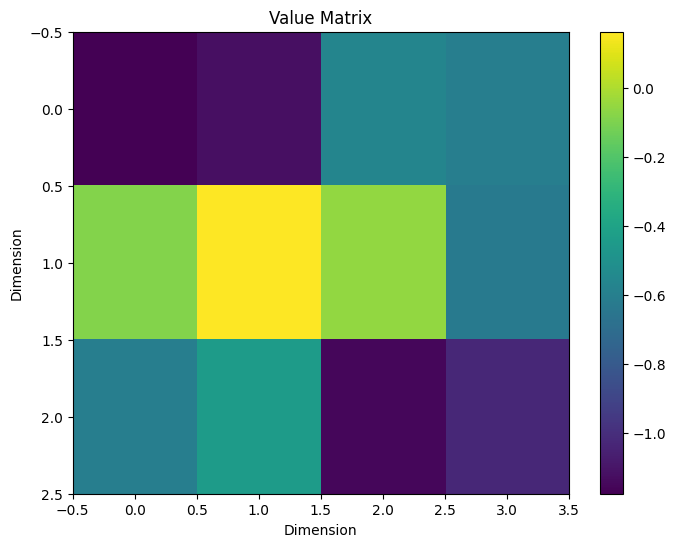

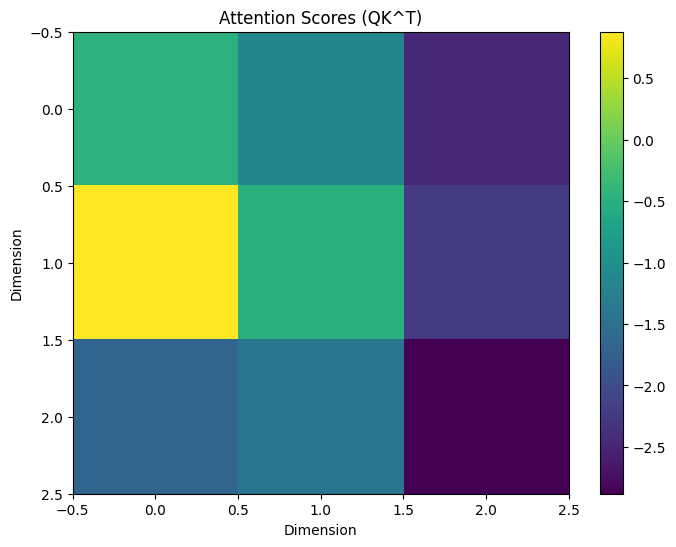

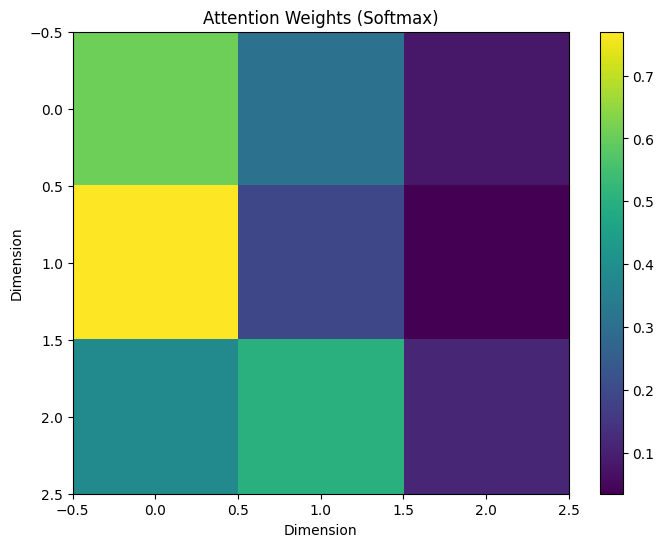

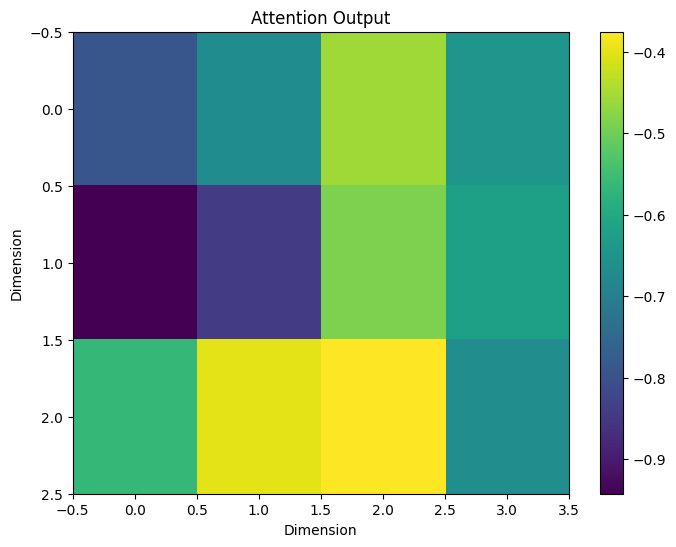

Input Sequence:
 [[1 0 1 0]
 [0 2 1 0]
 [1 1 0 1]]
Query Matrix:
 [[-0.9795951   0.5893739   0.43362057 -0.05796605]
 [ 0.06597769  0.55604154  2.0740645  -1.42956   ]
 [-0.03347522  0.8597896   0.59766465  0.7362714 ]]
Key Matrix:
 [[ 0.20682281 -0.15642494 -0.61900836 -1.5630829 ]
 [ 0.9148228   0.35241085 -1.2358139  -1.2681062 ]
 [ 1.2255719  -1.0144639  -1.7182341  -1.2776694 ]]
Value Matrix:
 [[-1.1754255  -1.119386   -0.5681962  -0.6000772 ]
 [-0.08613592  0.16416189 -0.05078435 -0.62940246]
 [-0.60200036 -0.44244903 -1.150917   -1.0279925 ]]
Attention Scores:
 [[-0.4726044  -1.1508214  -2.469463  ]
 [ 0.8773244  -0.49401084 -2.2204466 ]
 [-1.6622287  -1.3998973  -2.880891  ]]
Attention Weights:
 [[0.6085382  0.30884597 0.08261581]
 [0.76987183 0.19536874 0.03475951]
 [0.38526994 0.50083447 0.11389556]]
Attention Output:
 [[-0.79162884 -0.66704166 -0.45653757 -0.6444868 ]
 [-0.9426805  -0.8450909  -0.4873652  -0.62068063]
 [-0.5645611  -0.39944082 -0.3754278  -0.6635019 ]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

# Input sequence: a matrix where each row represents a feature vector for a sequence element
input_sequence = np.array([[1, 0, 1, 0],
                           [0, 2, 1, 0],
                           [1, 1, 0, 1]])

# Model parameters
d_model = input_sequence.shape[1]  # Dimension of the embeddings
num_heads = 1  # Number of attention heads (single head for simplicity)

# Create query, key, and value matrices using linear transformations (Dense layers)
query = tf.keras.layers.Dense(d_model)(input_sequence)
key = tf.keras.layers.Dense(d_model)(input_sequence)
value = tf.keras.layers.Dense(d_model)(input_sequence)

# Visualize the query, key, and value matrices
plot_matrix(query, "Query Matrix")
plot_matrix(key, "Key Matrix")
plot_matrix(value, "Value Matrix")

# Compute attention scores by performing dot product of queries and transposed keys
scores = tf.matmul(query, key, transpose_b=True)
plot_matrix(scores, "Attention Scores (QK^T)")

# Apply softmax to the scores to obtain attention weights
attention_weights = tf.nn.softmax(scores, axis=-1)
plot_matrix(attention_weights, "Attention Weights (Softmax)")

# Apply attention weights to the values to get the final attention output
attention_output = tf.matmul(attention_weights, value)
plot_matrix(attention_output, "Attention Output")

# Print the results for reference
print("Input Sequence:\n", input_sequence)
print("Query Matrix:\n", query.numpy())
print("Key Matrix:\n", key.numpy())
print("Value Matrix:\n", value.numpy())
print("Attention Scores:\n", scores.numpy())
print("Attention Weights:\n", attention_weights.numpy())
print("Attention Output:\n", attention_output.numpy())

### Detailed Explanations of Each Step
#### Input Sequence: The input sequence is a matrix where each row represents a feature vector for an element of the sequence. This is the data we want to apply self-attention to.

#### Query, Key, and Value Matrices: These matrices are created by applying linear transformations (Dense layers) to the input sequence.
- Queries: Used to compare against keys to measure similarity.
- Keys: Used in conjunction with queries to compute attention scores.
- Values: Contain the information we want to focus on and extract based on the computed attention scores.

#### Attention Scores:

- Calculated by taking the dot product of the query matrix and the transposed key matrix.
- This gives a measure of similarity between elements of the sequence.

#### Attention Weights:

- The scores are passed through a softmax function to convert them into probabilities (attention weights).
- These weights determine the relative importance of each element in the sequence.

#### Attention Output:

- The attention weights are applied to the value matrix to compute the final attention output.
- This output represents the weighted sum of values based on their attention weights, capturing the relevant information from the input sequence.

### Visualizations
- Query, Key, and Value Matrices: Visualized to understand how the input sequence is transformed.
- Attention Scores: Show the similarity measures between different elements of the sequence.
- Attention Weights: Show the normalized importance of each element in the sequence.
- Attention Output: The final weighted output that captures the important information based on the attention mechanism.

## Self-Attention mechanism: Using a sentence as input

The sentence "I love tennis" is represented using embeddings, and the self-attention mechanism is applied to transform these embeddings.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Example sentence embeddings (3 dimensions per word)
embeddings = {
    "I": [1, 0, 1],
    "love": [0, 1, 0],
    "tennis": [1, 1, 1]
}

# Convert sentence to sequence of embeddings
sentence = ["I", "love", "tennis"]
inputs = np.array([embeddings[word] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(3, 3)
Wk = np.random.rand(3, 3)
Wv = np.random.rand(3, 3)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Plotting the inputs
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Phrase:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

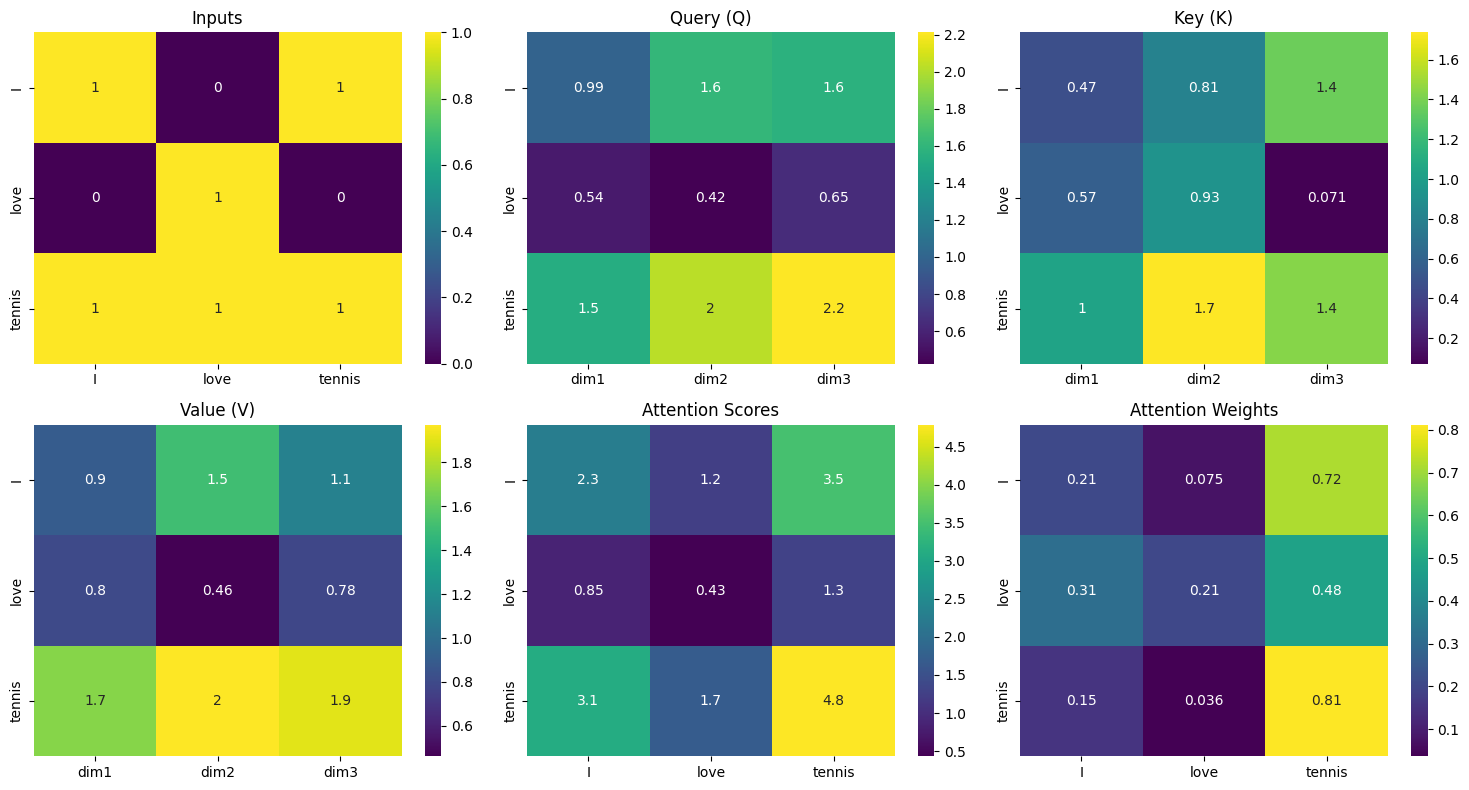

## Self-Attention mechanism: Word embeddings computing

To demonstrate a basic self-attention mechanism with real embeddings, we'll use a simple approach to compute word embeddings based on co-occurrence statistics from the given sentence. Here, I'll provide a complete example including the calculation of basic word embeddings and applying the self-attention mechanism.

### Step-by-Step Process
 - Tokenize the Sentence: We'll split the sentence into individual words (tokens).

 - Calculate Word Embeddings: We'll use a basic technique to create embeddings based on the context of each word. In this case, we'll use one-hot encoding as the simplest form of embedding.

 - Apply Self-Attention: Using the calculated embeddings, we'll apply the self-attention mechanism and visualize the intermediate results.

 - Initialize Weights: Random weights for Query (Q), Key (K), and Value (V) matrices are initialized.

 - Compute Q, K, and V Matrices: The input embeddings are transformed into Q, K, and V matrices using the initialized weights.

 - Compute Attention Scores: Attention scores are calculated by taking the dot product of Q and K transpose, then normalizing by the square root of the key dimension.

 - Apply Softmax to Get Attention Weights: The softmax function is applied to the attention scores to obtain the attention weights.

- Compute the Output: The final output is calculated by multiplying the attention weights with the value matrix V.

 - Visualization: Various stages of the self-attention mechanism (inputs, Q, K, V matrices, attention scores, and attention weights) are visualized using heatmaps.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Visualization
plt.figure(figsize=(18, 10))

# Plotting the inputs
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

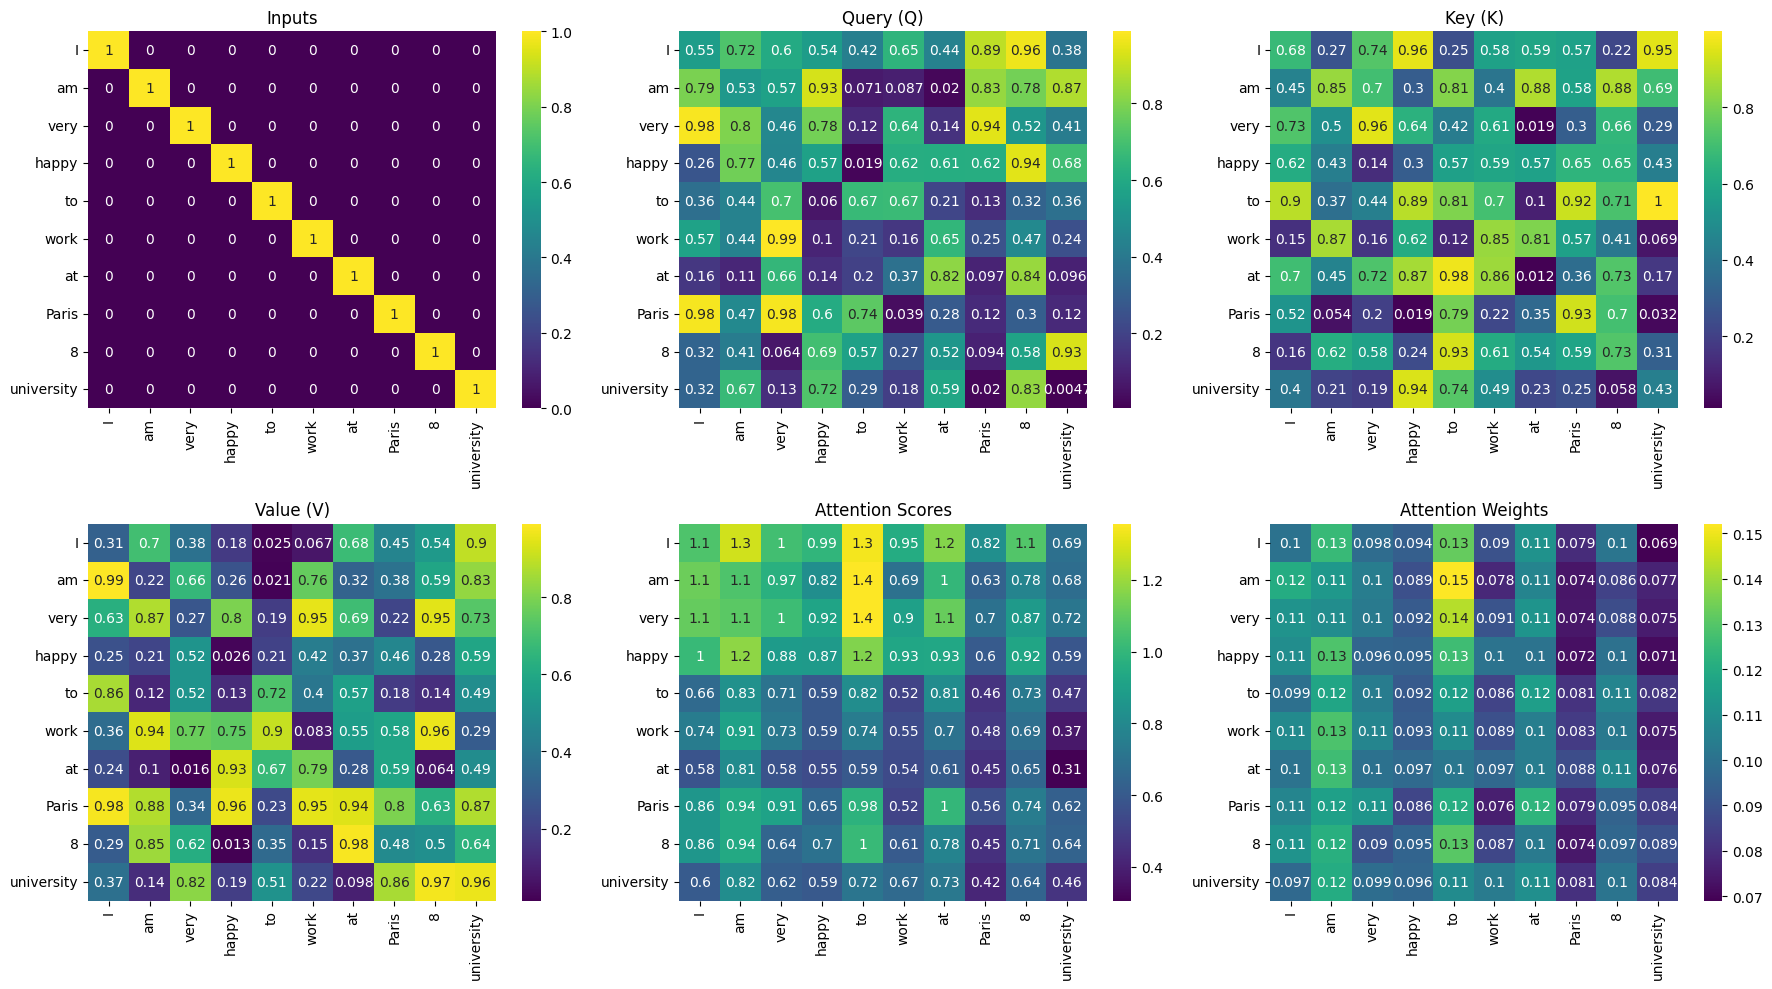

## Complete Encoder Implementation

The encoder implementation involves several key steps, each contributing to transforming the input data and capturing relationships and context within a sentence. Here’s a detailed explanation of each step:


1. Tokenization and Embedding

 - Tokenization: The input sentence "I am very happy to work at Paris 8 university" is split into individual words (tokens), creating a list of tokens.

 - Embedding: Each word in the sentence is represented using one-hot encoding, which is a basic form of word embedding. In one-hot encoding, each word is represented by a unique vector where only one element is 1 (indicating the presence of the word), and all other elements are 0.

2. Initialize Weights

 - Weight Initialization: Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices, as well as for the feed-forward neural network layers. These weights will be used to transform the input embeddings during the self-attention and feed-forward processes.

3. Self-Attention Layer

 - Compute Q, K, and V Matrices: The input embeddings are multiplied by the respective weight matrices to obtain the Q, K, and V matrices. These matrices are essential for calculating attention scores.

 - Calculate Attention Scores: The attention scores are calculated by taking the dot product of the Q matrix and the transpose of the K matrix. The resulting scores are then scaled by the square root of the dimension of the key vectors to ensure stable gradients.

 - Softmax Application: The softmax function is applied to the attention scores to convert them into probabilities, which represent the attention weights. These weights indicate how much attention each word should pay to other words in the sentence.

 - Compute Attention Output: The attention weights are multiplied by the V matrix to obtain the attention output. This output is a weighted sum of the value vectors, capturing the context and relationships between words.

4. Add & Norm Layer (Self-Attention)

 - Residual Connection and Layer Normalization: The attention output is added to the original input embeddings (residual connection) to preserve the initial information. Layer normalization is then applied to the result, ensuring stable and normalized outputs.

5. Feed-Forward Layer

 - Feed-Forward Neural Network: The output from the self-attention layer is passed through a feed-forward neural network, which typically consists of two linear transformations with a ReLU activation function in between. This layer further transforms the data, capturing more complex relationships.

6. Add & Norm Layer (Feed-Forward)

 - Residual Connection and Layer Normalization: The output from the feed-forward layer is added to the self-attention output (residual connection) and normalized again using layer normalization. This step helps in maintaining the stability and richness of the transformed data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)
W1 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 1 weights
W2 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 2 weights

# Self-Attention Layer
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
attention_weights = softmax(scores)
attention_output = np.dot(attention_weights, V)

# Add & Norm Layer (Self-Attention Output + Inputs)
attention_output = layer_norm(attention_output + inputs)

# Feed-Forward Layer
ffn_output = np.dot(attention_output, W1)
ffn_output = np.maximum(0, ffn_output)  # ReLU activation
ffn_output = np.dot(ffn_output, W2)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output + attention_output)

# Visualization
plt.figure(figsize=(20, 10))

# Plotting the inputs
plt.subplot(2, 4, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 4, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 4, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 4, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 4, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 4, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

# Plotting Attention Output
plt.subplot(2, 4, 7)
sns.heatmap(attention_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Output')

# Plotting Encoder Output
plt.subplot(2, 4, 8)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Encoder Output')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output:\n", attention_output)
print("\nFeed-Forward Output:\n", ffn_output)
print("\nEncoder Output:\n", encoder_output)

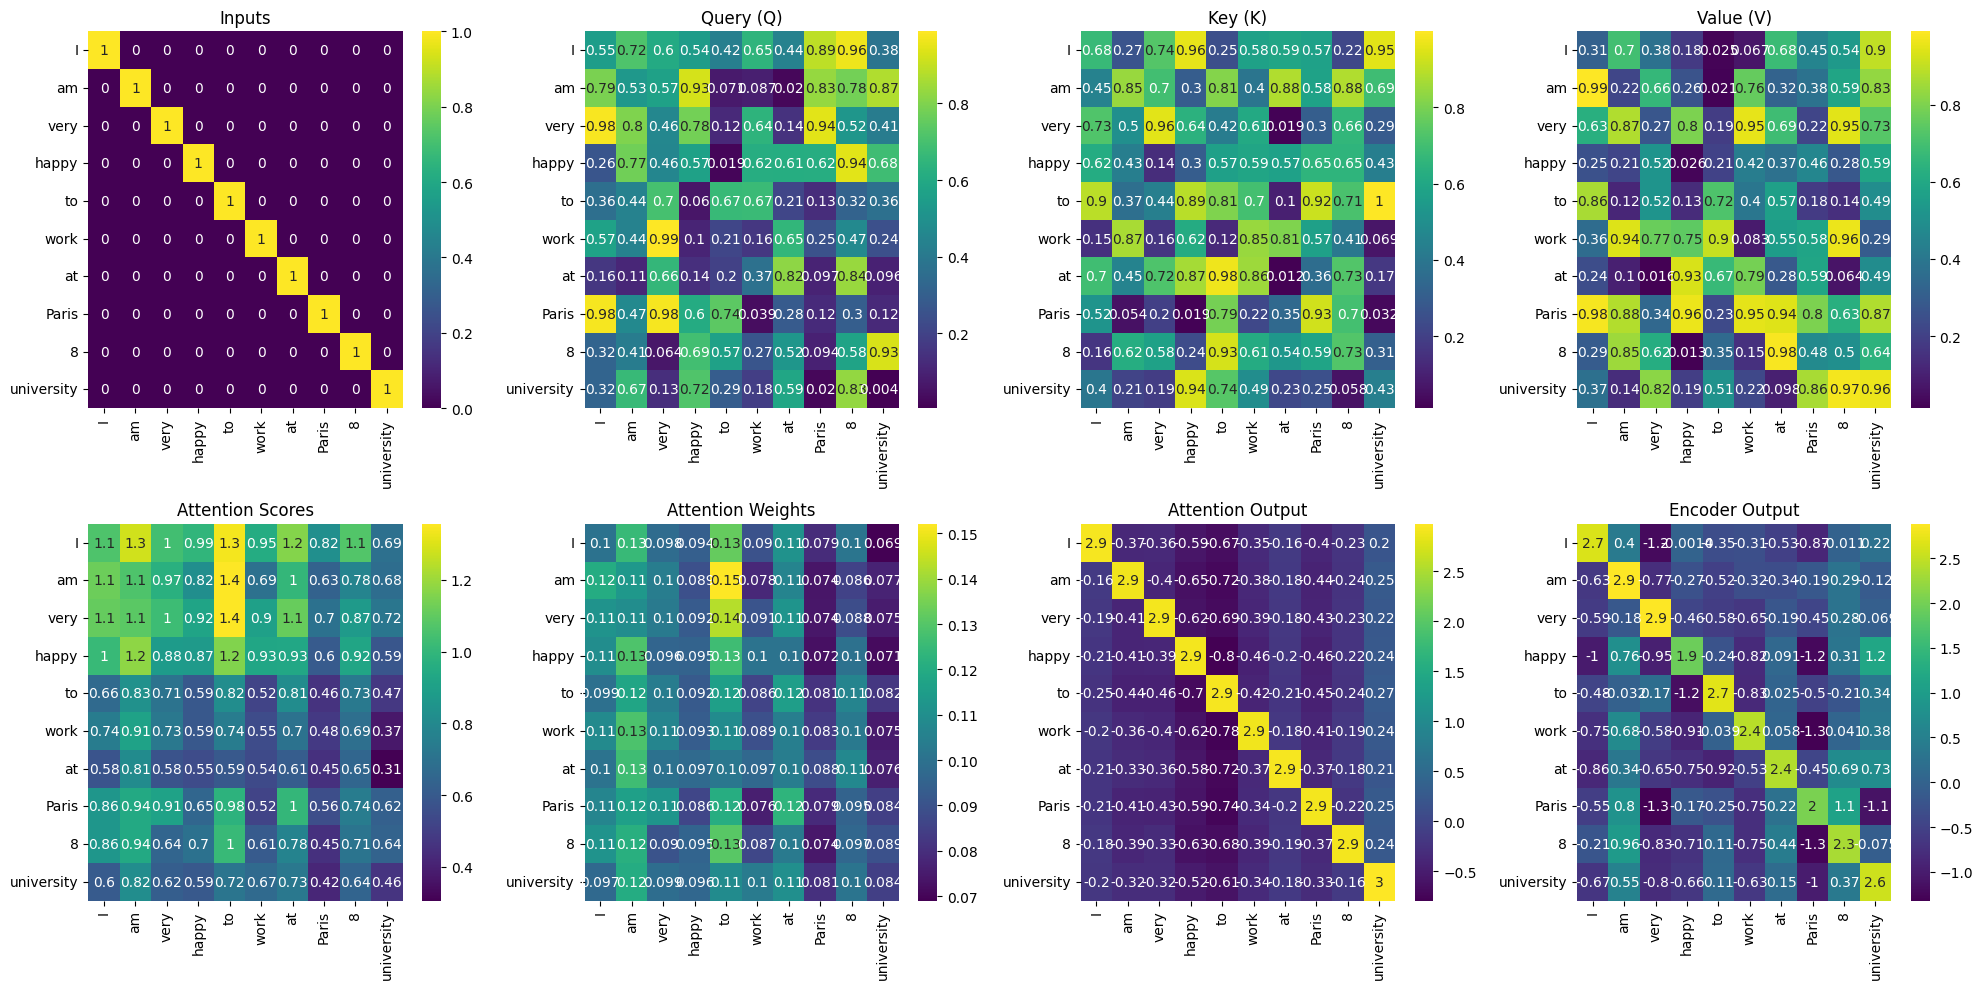

## Complete Encoder-Decoder Implementation Using Self-Attention

To implement a complete encoder-decoder model using self-attention, we'll extend the previous encoder implementation by adding a decoder component. The decoder will also include self-attention and cross-attention layers to process the encoder outputs and generate predictions.

1. Tokenization and Embedding

 - Tokenization: Both the source (encoder) sentence "I am very happy to work at Paris 8 university" and the target (decoder) sentence "Je suis très heureux de travailler à l'université Paris 8" are tokenized into individual words.

 - Embedding: Each word is converted into a one-hot vector representation. This simple embedding method is used to map each word to a unique vector.

2. Initialize Weights

 - Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices for both the encoder and decoder. Additionally, weights are initialized for the feed-forward layers in both the encoder and decoder.

3. Encoder

 - Self-Attention Layer: The input embeddings are transformed using the Q, K, and V matrices. Attention scores are computed and normalized using softmax to obtain attention weights. These weights are then used to compute the self-attention output.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the self-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final encoder output.

4. Decoder

 - Self-Attention Layer: The decoder inputs are transformed using their own Q, K, and V matrices. Attention scores are computed and normalized using softmax to obtain attention weights. These weights are then used to compute the self-attention output for the decoder.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Cross-Attention Layer: The decoder's self-attention output interacts with the encoder's output using Q matrices from the decoder and K, V matrices from the encoder. This step allows the decoder to attend to the encoder's outputs. Attention scores are computed and normalized using softmax to obtain cross-attention weights.

 - Add & Norm Layer (Cross-Attention): Residual connections are added to the cross-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the cross-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final decoder output.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

scores_encoder = np.dot(Q_encoder, K_encoder.T) / np.sqrt(K_encoder.shape[1])
attention_weights_encoder = softmax(scores_encoder)
attention_output_encoder = np.dot(attention_weights_encoder, V_encoder)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

scores_decoder = np.dot(Q_decoder, K_decoder.T) / np.sqrt(K_decoder.shape[1])
attention_weights_decoder = softmax(scores_decoder)
attention_output_decoder = np.dot(attention_weights_decoder, V_decoder)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

scores_cross = np.dot(Q_cross, K_cross.T) / np.sqrt(K_cross.shape[1])
attention_weights_cross = softmax(scores_cross)
cross_attention_output = np.dot(attention_weights_cross, V_cross)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

## Complete Encoder-Decoder Implementation Using Multi-Head Self-Attention : A transformer !

This encoder-decoder implementation with multi-head self-attention includes both self-attention and cross-attention mechanisms, residual connections, and layer normalization, demonstrating how the input sentence is transformed and how the decoder attends to the encoder's output to generate the final result. The multi-head attention mechanism allows the model to focus on different parts of the input sentence simultaneously, capturing more complex relationships and context.

1. Tokenization and Embedding

 - Tokenization: Both the source (encoder) sentence "I am very happy to work at Paris 8 university" and the target (decoder) sentence "Je suis très heureux de travailler à l'université Paris 8" are tokenized into individual words.

 - Embedding: Each word is converted into a one-hot vector representation. This simple embedding method is used to map each word to a unique vector.

2. Initialize Weights

 - Random weights are initialized for the Query (Q), Key (K), and Value (V) matrices for both the encoder and decoder, as well as for the feed-forward neural network layers. These weights are necessary for transforming the input embeddings during self-attention and feed-forward processes.

3. Multi-Head Self-Attention

 - Function Definition: The multi_head_attention function splits Q, K, and V matrices into multiple heads, performs self-attention on each head independently, and concatenates the outputs.

4. Encoder

 - Multi-Head Self-Attention Layer: The input embeddings are transformed using the Q, K, and V matrices. The multi_head_attention function is used to compute the self-attention output across multiple heads.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the self-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final encoder output.

5. Decoder

 - Multi-Head Self-Attention Layer: The decoder inputs are transformed using their own Q, K, and V matrices. The multi_head_attention function is used to compute the self-attention output across multiple heads for the decoder.

 - Add & Norm Layer (Self-Attention): Residual connections are added to the self-attention output, and layer normalization is applied.

 - Cross-Attention Layer: The decoder's self-attention output interacts with the encoder's output using Q matrices from the decoder and K, V matrices from the encoder. The multi_head_attention function is used to compute the cross-attention output across multiple heads, allowing the decoder to attend to the encoder's outputs.

 - Add & Norm Layer (Cross-Attention): Residual connections are added to the cross-attention output, and layer normalization is applied.

 - Feed-Forward Layer: The output of the cross-attention layer is passed through a feed-forward neural network with ReLU activation.

 - Add & Norm Layer (Feed-Forward): Residual connections are added to the feed-forward output, and layer normalization is applied, resulting in the final decoder output.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Multi-head attention function
def multi_head_attention(Q, K, V, num_heads):
    d_model = Q.shape[-1] # Get the embedding dimension
    d_k = d_model // num_heads # Calculate the dimension of each head
    
    # Linear transformations for each head
    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)] 
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    
    attention_outputs = []
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].T) / np.sqrt(d_k)
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)
    
    # Concatenate all the heads
    concatenated_output = np.concatenate(attention_outputs, axis=-1)
    
    # Linear transformation to map the concatenated output back to the original dimension
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
num_heads = 4
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Multi-Head Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

attention_output_encoder = multi_head_attention(Q_encoder, K_encoder, V_encoder, num_heads)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Multi-Head Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

attention_output_decoder = multi_head_attention(Q_decoder, K_decoder, V_decoder, num_heads)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

cross_attention_output = multi_head_attention(Q_cross, K_cross, V_cross, num_heads)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

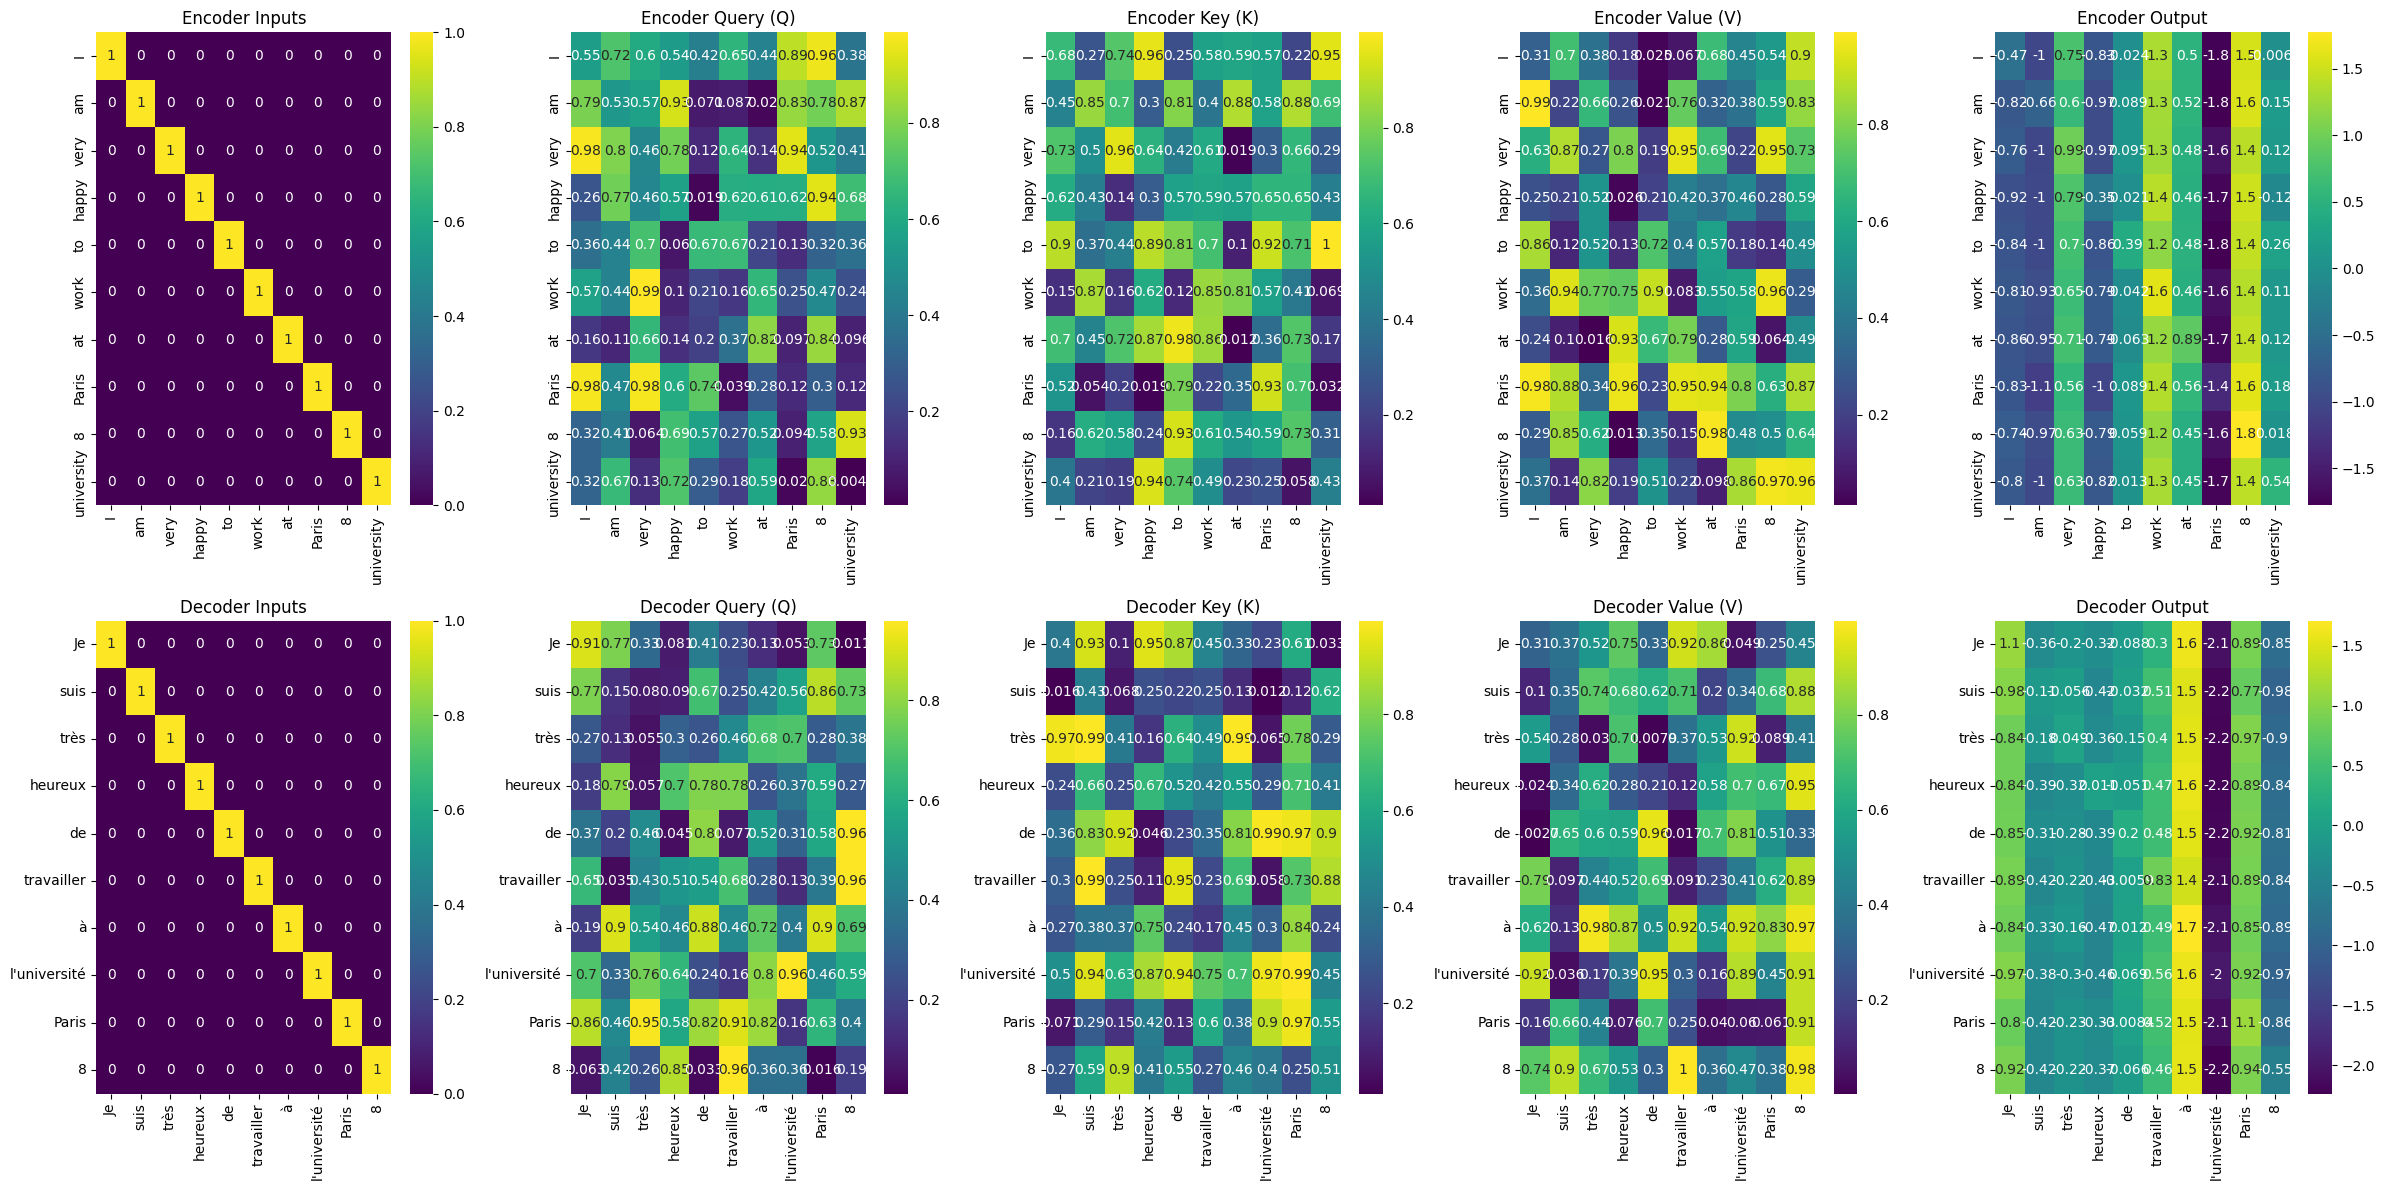

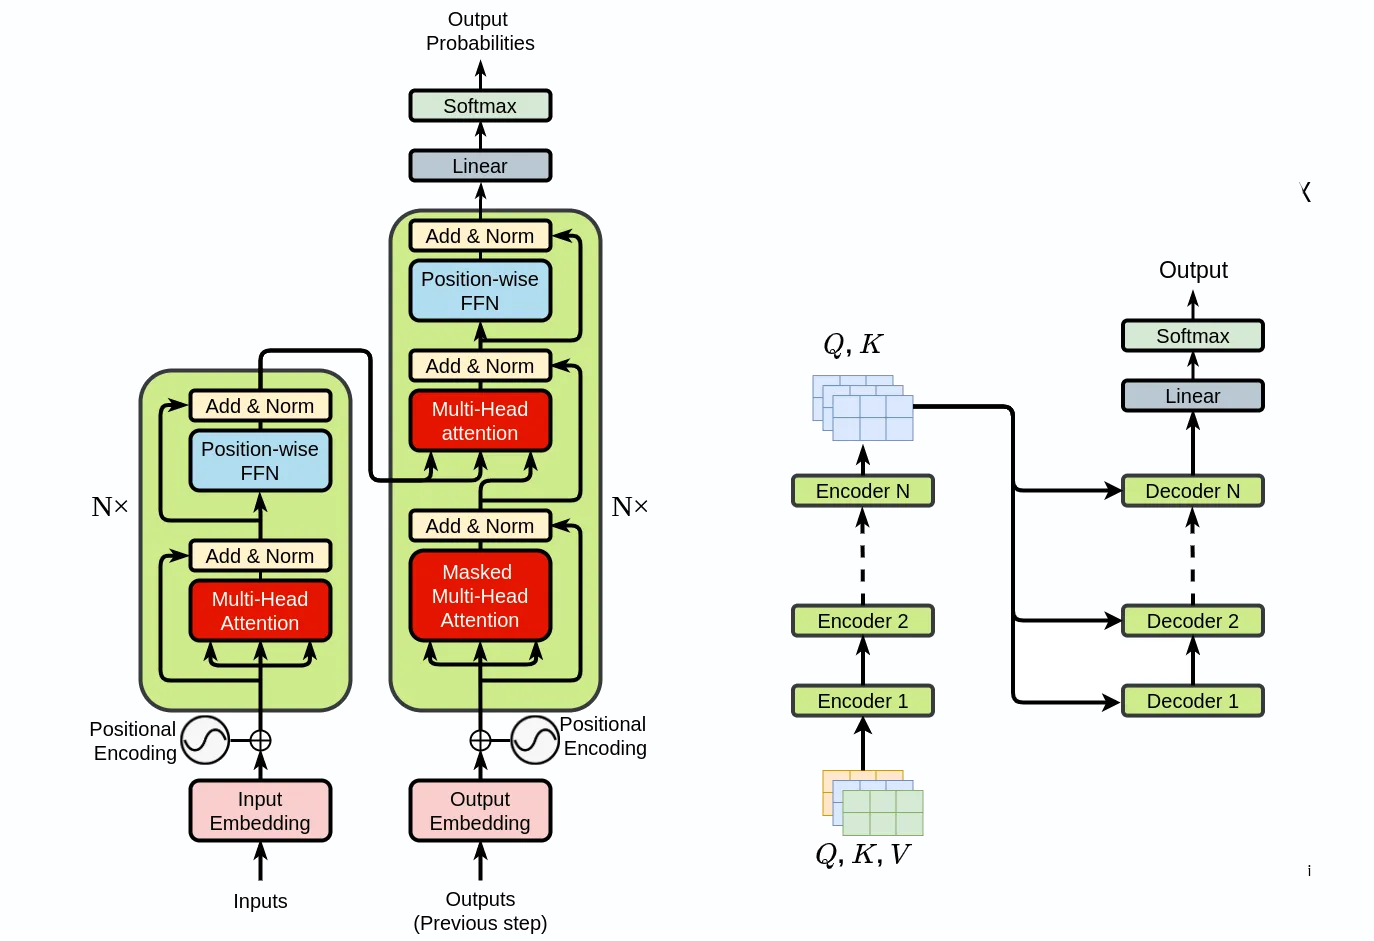

## Exercices 

### Exercice 1 : Self-Attention mechanism: basic implementation

- Modify the `input_sequence` to include an additional dimension and write a function to handle this new input shape. Compute and visualize the query, key, and value matrices for this modified sequence.
- Change the number of attention heads to 2 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head attention.
- Experiment with different scaling factors for the attention scores. Instead of dividing by the square root of the key dimension, try different constants and observe the effects on the attention weights and output. Visualize and discuss the impact.

### Exercice 2: Self-Attention mechanism: Using a sentence as input

- Change the sentence from "I love tennis" to a longer sentence of your choice. Convert this new sentence into a sequence of embeddings and compute the query, key, and value matrices. Visualize and explain the results.
- Implement a masking mechanism to handle padding tokens in the sentence. Compute the attention scores and apply the mask before softmax. Visualize the attention weights with and without masking and discuss the differences.
- Experiment with different embedding initialization methods. Use random initialization and pre-trained embeddings (e.g., from GloVe or FastText). Compute and visualize the attention scores and outputs for both cases. Compare the results.

### Exercice 3: Self-Attention mechanism: Compute word embeddings

- Use a different sentence to compute word embeddings. Tokenize the sentence and create embeddings using a different method (e.g., Word2Vec or GloVe). Compute the query, key, and value matrices for these new embeddings and visualize the results.
- Change the method for initializing weights for the query, key, and value matrices. Use a different initialization technique (e.g., Xavier initialization) and compute the attention scores and attention weights. Visualize and discuss the impact of weight initialization on the self-attention mechanism.
- Implement a positional encoding mechanism for the sentence. Add positional encodings to the embeddings and compute the query, key, and value matrices. Visualize and explain the role of positional encoding in the self-attention mechanism.

### Exercice 4: Self-Attention mechanism: Varying Parameters

- Modify the dimensionality of the embeddings for a given sentence. Experiment with embedding dimensions of 4, 8, and 16. Compute the query, key, and value matrices for each case. Visualize and compare the attention weights and outputs for different embedding dimensions.
- Change the number of attention heads to 4 and implement the multi-head attention mechanism. Compute and visualize the attention weights and output. Compare the results with single-head and two-head attention.
- Implement dropout in the attention mechanism. Apply dropout to the attention weights before computing the final attention output. Visualize the results with and without dropout and discuss the impact on the attention mechanism.

### Exercice 5: Self-Attention mechanism: Advanced Techniques

- Implement layer normalization before and after the attention mechanism. Compare the results of both approaches by visualizing the attention weights and outputs. Discuss the impact of layer normalization on the self-attention mechanism.
- Experiment with different activation functions in the feed-forward layer following the attention mechanism. Replace ReLU with other functions (e.g., Leaky ReLU, ELU). Compute and visualize the attention outputs for each activation function and compare the results.
- Implement a mechanism to handle variable-length sequences using masking. Compute the attention scores and apply the mask to ignore padding tokens. Visualize the attention weights and outputs with and without masking and discuss the differences.

### Exercice 6: Self-Attention mechanism: Applications

- Apply the self-attention mechanism to a sentence with named entities (e.g., "Barack Obama was the 44th president of the United States"). Compute the query, key, and value matrices, and visualize the attention weights. Discuss how the self-attention mechanism handles named entities.
- Use the self-attention mechanism for a sequence-to-sequence task (e.g., translation). Compute the attention weights for both the encoder and decoder sequences. Visualize the results and discuss how the attention mechanism captures the relationships between input and output sequences.
- Implement a self-attention mechanism for a text classification task. Compute the attention weights for a sentence and use the final attention output as features for classification. Visualize the attention weights and discuss how the self-attention mechanism helps in identifying important features for classification.

### Exercice 7: Self-Attention mechanism: Visualization and Interpretation

- Use a heatmap to visualize the attention weights for a given sentence. Write a function to plot the heatmap and explain the importance of each word in the context of the sentence.
- Modify the input sentence to include ambiguous words (e.g., "bank" in "The bank will not lend me money"). Compute and visualize the attention weights. Discuss how the self-attention mechanism disambiguates the meaning based on context.
- Implement an interactive visualization tool that allows changing the input sentence and observing the changes in attention weights. Use this tool to demonstrate how different words and their positions affect the attention mechanism.

### Exercice 8: Self-Attention mechanism: Extensions and Modifications

- Extend the self-attention mechanism to include relative position encodings. Compute the attention weights with relative positions and visualize the results. Discuss how relative position encodings improve the model's understanding of the input sequence.
- Implement a variant of the self-attention mechanism that uses a different similarity measure (e.g., cosine similarity instead of dot product). Compute and visualize the attention weights for this new similarity measure and compare the results with the original mechanism.
- Explore the use of multi-headed attention with different numbers of heads. Write functions to compute the attention weights for 1, 2, 4, and 8 heads. Visualize and compare the results, discussing how the number of heads affects the model's performance and complexity.

### Exercice 9: Self-Attention mechanism: Practical Applications

- Apply the self-attention mechanism to a real-world dataset (e.g., a collection of movie reviews). Compute the attention weights for sample sentences and visualize the results. Discuss how the self-attention mechanism captures sentiment and important phrases in the reviews.
- Implement a self-attention mechanism for a document summarization task. Use the attention weights to identify key sentences and generate a summary of the document. Visualize and evaluate the quality of the summary.
- Use the self-attention mechanism to build a question-answering system. Compute the attention weights for questions and corresponding context paragraphs. Visualize the attention weights and discuss how the model identifies relevant information to answer the questions.

**Exeo1_res**

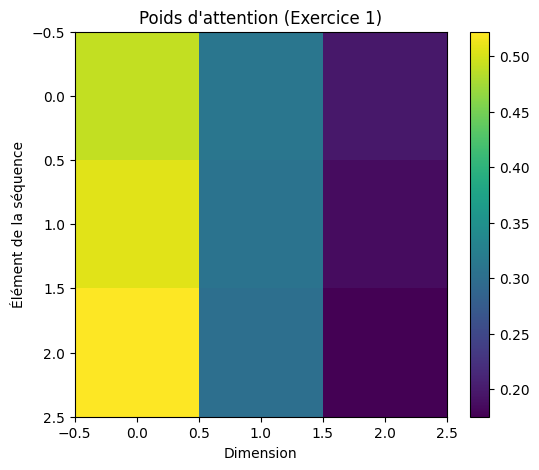

Poids d'attention (Exercice 1) :\n [[0.49019724 0.31165743 0.19814539]
 [0.50620043 0.30727577 0.18652372]
 [0.5220654  0.30257285 0.17536172]]


In [19]:
# Nouvelle séquence d'entrée pour l'exercice 1
input_sequence_exo1 = np.array([[1, 1, 1, 1],
                                [1, 1, 1, 2],
                                [1, 1, 1, 3]])

# Recalculons les matrices avec cette nouvelle séquence
query_exo1 = tf.keras.layers.Dense(d_model)(input_sequence_exo1)
key_exo1 = tf.keras.layers.Dense(d_model)(input_sequence_exo1)
value_exo1 = tf.keras.layers.Dense(d_model)(input_sequence_exo1)
scores_exo1 = tf.matmul(query_exo1, key_exo1, transpose_b=True)
attention_weights_exo1 = tf.nn.softmax(scores_exo1, axis=-1)
attention_output_exo1 = tf.matmul(attention_weights_exo1, value_exo1)

# Visualisons les nouveaux poids d'attention
plot_matrix(attention_weights_exo1, "Poids d'attention (Exercice 1)")

print("Poids d'attention (Exercice 1) :\\n", attention_weights_exo1.numpy())

**Exeo2_res**

Phrase en entrée: ['je', 'suis', 'un', 'etudiant']
Séquence d'embeddings (One-Hot) :\n [[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]]


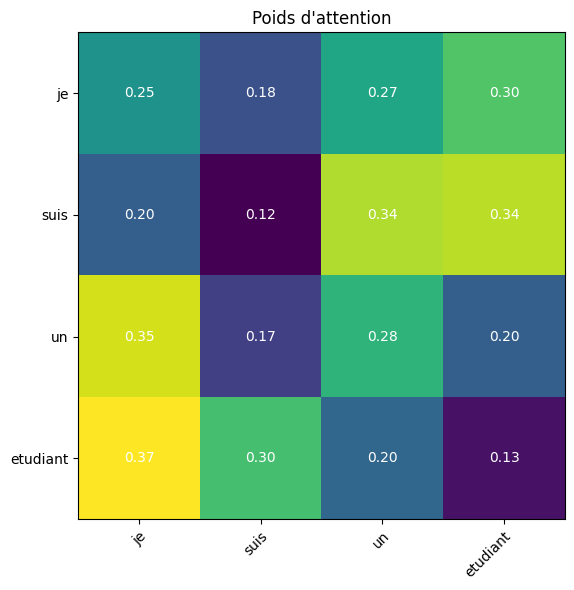

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_attention_head(attention, sentence):
    """Fonction pour visualiser les poids d'attention avec les mots en labels."""
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(attention, cmap='viridis')

    # Configuration des labels
    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence)
    ax.set_yticklabels(sentence)

    # Rotation des labels pour une meilleure lisibilité
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Ajout des valeurs dans chaque case
    for i in range(len(sentence)):
        for j in range(len(sentence)):
            text = ax.text(j, i, f"{attention[i, j]:.2f}",
                           ha="center", va="center", color="w")
    
    ax.set_title("Poids d'attention")
    fig.tight_layout()
    plt.show()

# 1. Nouvelle phrase plus longue
sentence = ["je", "suis", "un", "etudiant"]
vocab = {"<pad>": 0, "je": 1, "suis": 2, "un": 3, "etudiant": 4, "a": 5, "paris": 6}
ids = [vocab[word] for word in sentence]

# 2. Création des embeddings (ici, des one-hot vectors pour la simplicité)
embedding_dim = len(vocab)
input_sequence = tf.one_hot(ids, depth=embedding_dim)

print("Phrase en entrée:", sentence)
print("Séquence d'embeddings (One-Hot) :\\n", input_sequence.numpy())

# 3. Calcul de Q, K, V
d_model = embedding_dim
query_layer = tf.keras.layers.Dense(d_model, name="query")
key_layer = tf.keras.layers.Dense(d_model, name="key")
value_layer = tf.keras.layers.Dense(d_model, name="value")

query = query_layer(input_sequence)
key = key_layer(input_sequence)
value = value_layer(input_sequence)

# 4. Calcul de l'attention
scores = tf.matmul(query, key, transpose_b=True)
attention_weights = tf.nn.softmax(scores, axis=-1)

# 5. Visualisation
plot_attention_head(attention_weights.numpy(), sentence)

**Exo3_res**

Séquence d'embeddings (type GloVe simulé) :\n [[0.1 0.1 0.8 0.1]
 [0.9 0.1 0.2 0.3]
 [0.2 0.9 0.1 0.4]
 [0.1 0.8 0.3 0.2]
 [0.1 0.1 0.8 0.1]
 [0.8 0.2 0.1 0.9]]


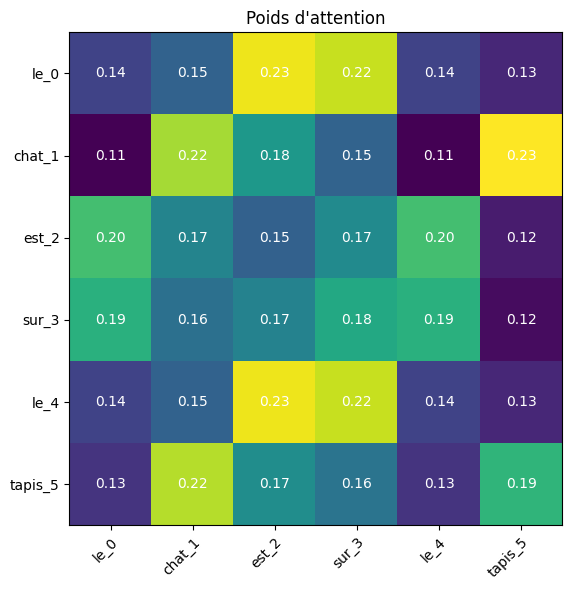

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_attention_head(attention, sentence):
    """Fonction de visualisation améliorée."""
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(attention, cmap='viridis')
    sentence_labels = [f"{word}_{i}" for i, word in enumerate(sentence)]
    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence_labels)
    ax.set_yticklabels(sentence_labels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(len(sentence)):
        for j in range(len(sentence)):
            ax.text(j, i, f"{attention[i, j]:.2f}", ha="center", va="center", color="w")
    ax.set_title("Poids d'attention")
    fig.tight_layout()
    plt.show()

# 1. Nouvelle phrase et simulation d'embeddings GloVe
sentence = ["le", "chat", "est", "sur", "le", "tapis"]
embedding_dim = 4 # Dimension de nos embeddings simulés

# Vecteurs conçus pour avoir un sens : "chat" et "tapis" sont des "objets" (valeurs élevées en dim 0)
# "est" et "sur" sont des "relations" (valeurs élevées en dim 1 et 2)
glove_simulated = {
    "le":    np.array([0.1, 0.1, 0.8, 0.1]), # Article
    "chat":  np.array([0.9, 0.1, 0.2, 0.3]), # Objet/Animal
    "est":   np.array([0.2, 0.9, 0.1, 0.4]), # Relation/Verbe
    "sur":   np.array([0.1, 0.8, 0.3, 0.2]), # Relation/Préposition
    "tapis": np.array([0.8, 0.2, 0.1, 0.9])  # Objet
}
input_sequence = tf.constant([glove_simulated[word] for word in sentence], dtype=tf.float32)

print("Séquence d'embeddings (type GloVe simulé) :\\n", input_sequence.numpy())

# 2. Calcul de Q, K, V
d_model = embedding_dim
query = tf.keras.layers.Dense(d_model)(input_sequence)
key = tf.keras.layers.Dense(d_model)(input_sequence)
value = tf.keras.layers.Dense(d_model)(input_sequence)
scores = tf.matmul(query, key, transpose_b=True)
attention_weights = tf.nn.softmax(scores, axis=-1)

# 3. Visualisation
plot_attention_head(attention_weights.numpy(), sentence)

\n--- Initialisation avec Xavier (Glorot) ---


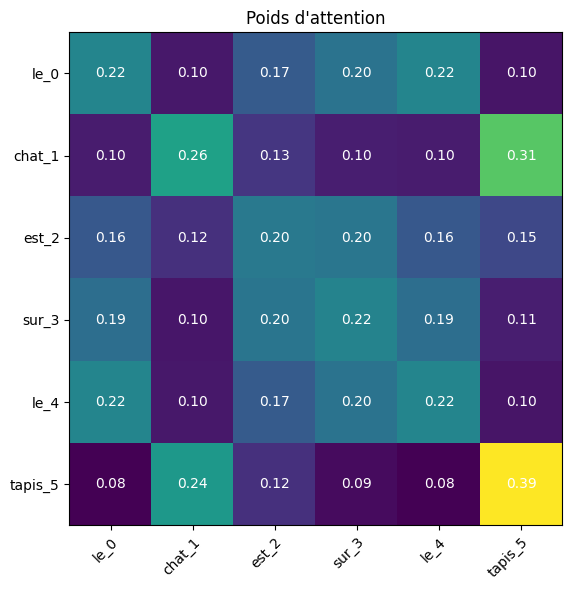

In [2]:
# On garde les mêmes embeddings de la partie 1
print("\\n--- Initialisation avec Xavier (Glorot) ---")

# Utilisation de l'initialiseur 'glorot_uniform' (nom de Xavier dans TensorFlow)
initializer = tf.keras.initializers.GlorotUniform()

# On définit explicitement l'initialiseur pour nos couches
query_layer_xavier = tf.keras.layers.Dense(d_model, kernel_initializer=initializer)
key_layer_xavier = tf.keras.layers.Dense(d_model, kernel_initializer=initializer)

# Calcul de Q et K avec les nouvelles couches
query_xavier = query_layer_xavier(input_sequence)
key_xavier = key_layer_xavier(input_sequence)

scores_xavier = tf.matmul(query_xavier, key_xavier, transpose_b=True)
attention_weights_xavier = tf.nn.softmax(scores_xavier, axis=-1)

# Visualisation
plot_attention_head(attention_weights_xavier.numpy(), sentence)

\nMatrice d'encodage positionnel :\n [[ 0.          1.          0.          1.        ]
 [ 0.84147096  0.5403023   0.00999983  0.99995   ]
 [ 0.9092974  -0.41614684  0.01999867  0.9998    ]
 [ 0.14112    -0.9899925   0.0299955   0.99955004]
 [-0.7568025  -0.6536436   0.03998933  0.9992001 ]
 [-0.9589243   0.2836622   0.04997917  0.99875027]]
\nEmbeddings + Encodage Positionnel :\n [[ 0.1         1.1         0.8         1.1       ]
 [ 1.7414709   0.6403023   0.20999983  1.29995   ]
 [ 1.1092974   0.48385313  0.11999866  1.3998001 ]
 [ 0.24112001 -0.18999249  0.3299955   1.19955   ]
 [-0.6568025  -0.5536436   0.83998936  1.0992001 ]
 [-0.15892428  0.4836622   0.14997917  1.8987503 ]]


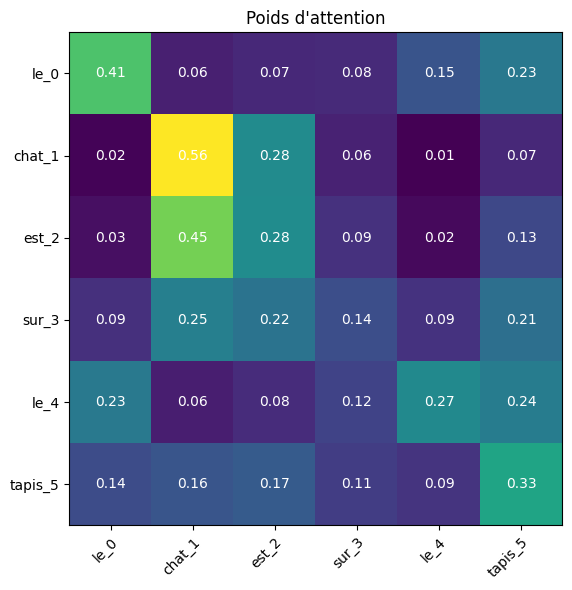

In [3]:
def get_positional_encoding(seq_len, d_model):
    """Calcule le vecteur d'encodage positionnel."""
    positions = np.arange(seq_len)[:, np.newaxis] # (seq_len, 1)
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    
    pe = np.zeros((seq_len, d_model))
    pe[:, 0::2] = np.sin(positions * div_term)
    pe[:, 1::2] = np.cos(positions * div_term)
    
    return tf.constant(pe, dtype=tf.float32)

seq_len = len(sentence)

# 1. Calculer l'encodage positionnel
positional_encoding = get_positional_encoding(seq_len, d_model)

# 2. Ajouter l'encodage aux embeddings
input_with_pos = input_sequence + positional_encoding

print("\\nMatrice d'encodage positionnel :\\n", positional_encoding.numpy())
print("\\nEmbeddings + Encodage Positionnel :\\n", input_with_pos.numpy())


# 3. Recalculer l'attention avec les nouvelles entrées
query_pos = query_layer_xavier(input_with_pos) # On réutilise les couches de la partie 2
key_pos = key_layer_xavier(input_with_pos)

scores_pos = tf.matmul(query_pos, key_pos, transpose_b=True)
attention_weights_pos = tf.nn.softmax(scores_pos, axis=-1)

# Visualisation
plot_attention_head(attention_weights_pos.numpy(), sentence)

**Exo4_res**

--- Test avec une dimension de 4 ---


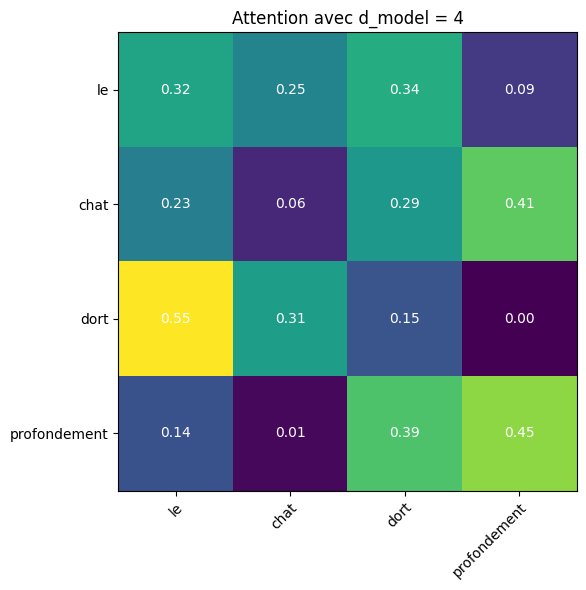

--- Test avec une dimension de 8 ---


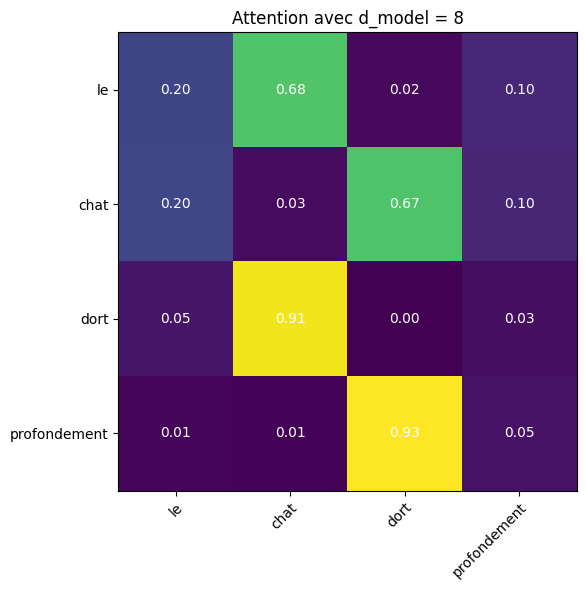

--- Test avec une dimension de 16 ---


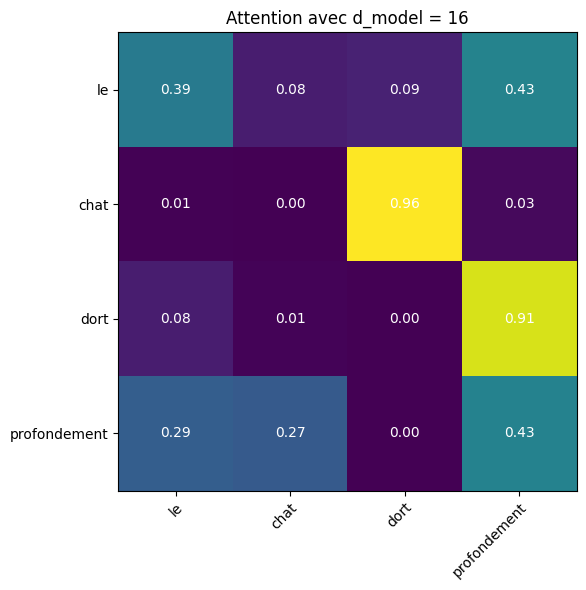

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# On garde notre fonction de visualisation pratique
def plot_attention_head(attention, sentence, title=""):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(attention, cmap='viridis')
    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence)
    ax.set_yticklabels(sentence)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(len(sentence)):
        for j in range(len(sentence)):
            ax.text(j, i, f"{attention[i, j]:.2f}", ha="center", va="center", color="w")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

# Phrase de test
sentence = ["le", "chat", "dort", "profondement"]
seq_len = len(sentence)

def run_attention_with_dim(embedding_dim):
    """Calcule et visualise l'attention pour une dimension d'embedding donnée."""
    
    print(f"--- Test avec une dimension de {embedding_dim} ---")
    
    # 1. Créer des embeddings aléatoires de la dimension souhaitée
    # On utilise un initialiseur constant pour la reproductibilité
    initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
    input_sequence = initializer(shape=(seq_len, embedding_dim))
    
    # 2. Couches Q, K, V
    query_layer = tf.keras.layers.Dense(embedding_dim)
    key_layer = tf.keras.layers.Dense(embedding_dim)
    
    query = query_layer(input_sequence)
    key = key_layer(input_sequence)
    
    # 3. Calcul de l'attention
    scores = tf.matmul(query, key, transpose_b=True)
    attention_weights = tf.nn.softmax(scores, axis=-1)
    
    # 4. Visualisation
    plot_attention_head(attention_weights.numpy(), sentence, title=f"Attention avec d_model = {embedding_dim}")

# Expérimentons avec les dimensions 4, 8, et 16
run_attention_with_dim(4)
run_attention_with_dim(8)
run_attention_with_dim(16)

\n--- Test avec 4 têtes et d_model = 16 ---


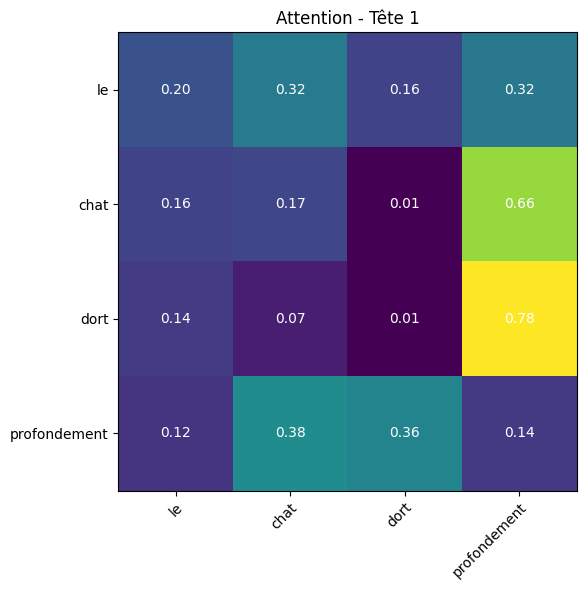

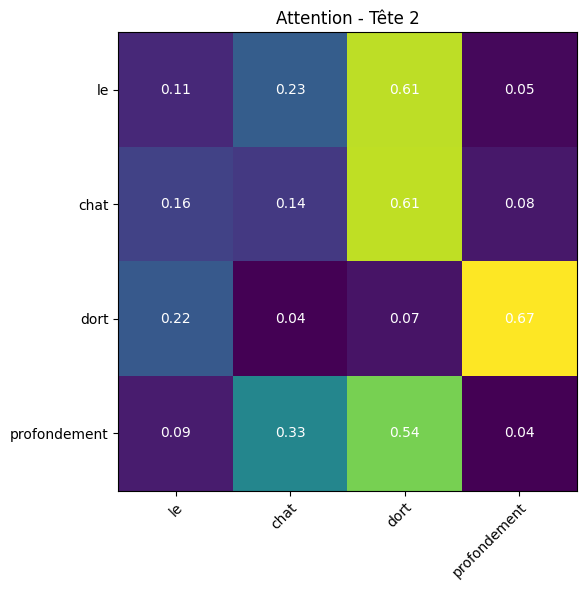

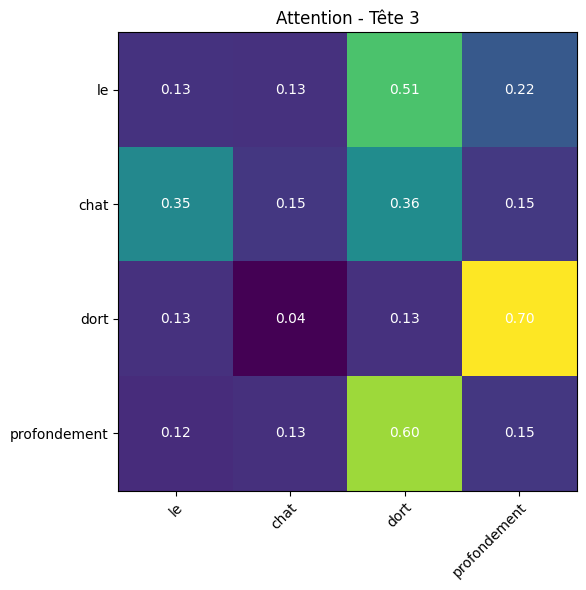

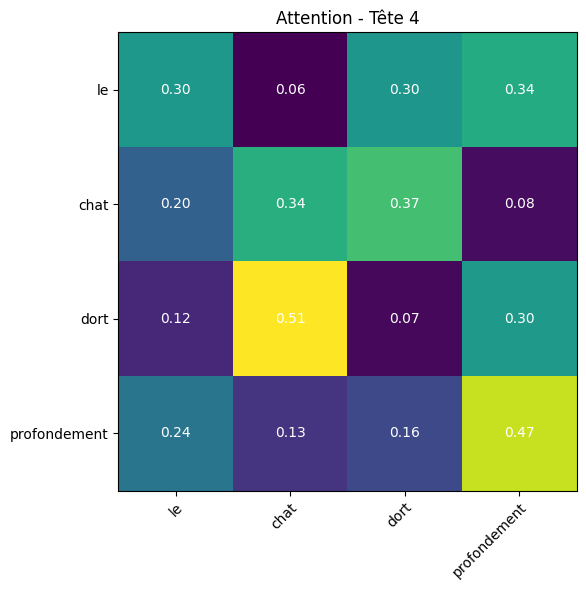

Sortie finale de l'attention à 4 têtes :\n [[-0.5560341  -0.49573597  0.20314597  0.3831954  -0.9448798   0.02102165
   0.30654383  0.6056139  -0.52457273  1.0975094  -0.51633203  0.09971384
   0.23942031 -0.02099314 -0.49488258 -0.07007013]
 [-0.5611717  -1.2288848  -0.0726882   1.0700227  -1.1652272   0.22055443
   0.25537533  0.5330004  -0.5694818   1.5570941  -0.53692687 -0.17034036
  -0.08500436  0.42759892 -0.41209674 -0.4631744 ]
 [ 0.16640769 -0.15083796  0.07787378  0.6940896  -0.18222736  0.22969301
   0.02506148  1.1011134  -0.24145247  0.889198    0.29228505  0.25157037
  -0.54986376  1.2477462  -0.41931707 -0.79737246]
 [-0.4883683   0.0255406   0.36807254  0.18667975 -0.9244434   0.08098574
   0.17040505  0.7361498  -0.29854664  0.5719547  -0.40509844  0.41232044
   0.3997123  -0.36951056 -0.3385806   0.20056985]]


In [5]:
def multi_head_attention(d_model, num_heads, input_sequence):
    """Calcule et visualise l'attention multi-têtes."""
    
    print(f"\\n--- Test avec {num_heads} têtes et d_model = {d_model} ---")
    
    # La dimension du modèle doit être divisible par le nombre de têtes
    assert d_model % num_heads == 0
    head_dim = d_model // num_heads
    
    # Couches de projection
    W_q = tf.keras.layers.Dense(d_model)
    W_k = tf.keras.layers.Dense(d_model)
    W_v = tf.keras.layers.Dense(d_model)
    W_o = tf.keras.layers.Dense(d_model)

    query = W_q(input_sequence)
    key = W_k(input_sequence)
    value = W_v(input_sequence)

    # Fonction pour séparer les têtes
    def split_heads(tensor):
        return tf.transpose(tf.reshape(tensor, (seq_len, num_heads, head_dim)), perm=[1, 0, 2])
        
    query_h = split_heads(query) # Shape: (num_heads, seq_len, head_dim)
    key_h = split_heads(key)
    value_h = split_heads(value)

    # Calcul de l'attention pour toutes les têtes en parallèle
    scores = tf.matmul(query_h, key_h, transpose_b=True) / tf.sqrt(tf.cast(head_dim, tf.float32))
    attention_weights = tf.nn.softmax(scores, axis=-1)
    
    # Visualisation de chaque tête
    for i in range(num_heads):
        plot_attention_head(attention_weights[i].numpy(), sentence, title=f"Attention - Tête {i+1}")
        
    # Concaténation et sortie finale
    output = tf.matmul(attention_weights, value_h)
    output = tf.transpose(output, perm=[1, 0, 2]) # (seq_len, num_heads, head_dim)
    concatenated_output = tf.reshape(output, (seq_len, d_model))
    final_output = W_o(concatenated_output)
    
    return final_output

# On choisit une dimension divisible par 4
d_model = 16
input_sequence_mha = tf.random.normal((seq_len, d_model))
final_output = multi_head_attention(d_model, 4, input_sequence_mha)

print("Sortie finale de l'attention à 4 têtes :\\n", final_output.numpy())

\n--- Comparaison avec et sans Dropout ---


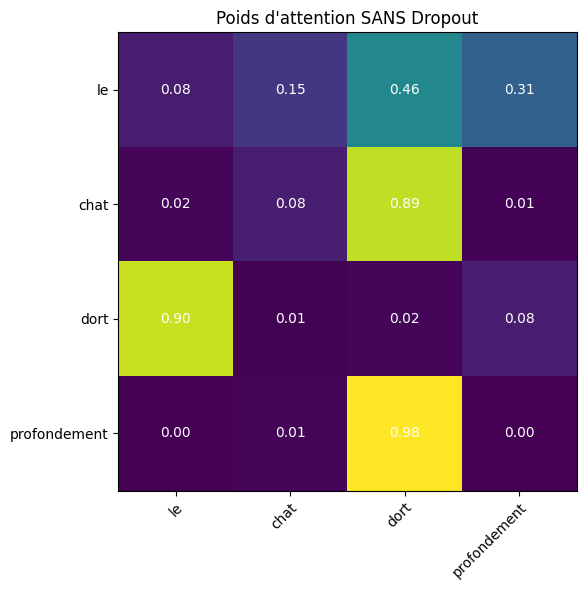

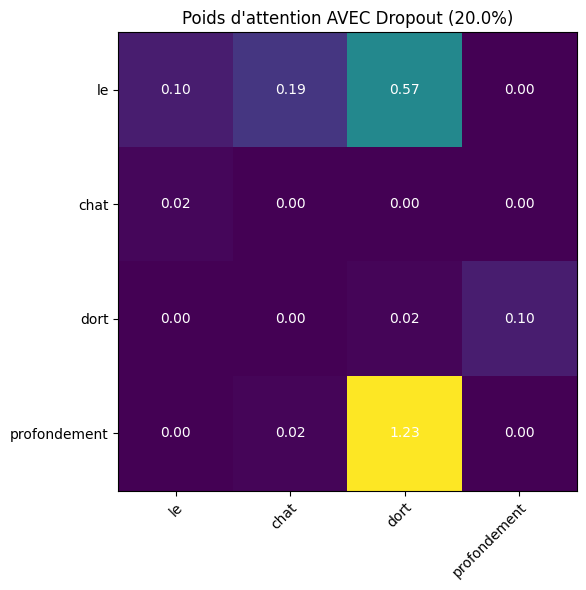

In [6]:
# On reprend un calcul simple à une seule tête pour l'illustration
d_model_dropout = 16
input_sequence_dropout = tf.random.normal((seq_len, d_model_dropout))

query = tf.keras.layers.Dense(d_model_dropout)(input_sequence_dropout)
key = tf.keras.layers.Dense(d_model_dropout)(input_sequence_dropout)
value = tf.keras.layers.Dense(d_model_dropout)(input_sequence_dropout)

scores = tf.matmul(query, key, transpose_b=True)
attention_weights = tf.nn.softmax(scores, axis=-1)

# Application du Dropout
dropout_rate = 0.2 # On "éteint" 20% des poids en moyenne
dropout_layer = tf.keras.layers.Dropout(dropout_rate)

# Important: Le dropout n'est actif que pendant l'entraînement.
# On le simule ici avec training=True
attention_weights_with_dropout = dropout_layer(attention_weights, training=True)

print("\\n--- Comparaison avec et sans Dropout ---")
plot_attention_head(attention_weights.numpy(), sentence, title="Poids d'attention SANS Dropout")
plot_attention_head(attention_weights_with_dropout.numpy(), sentence, title=f"Poids d'attention AVEC Dropout ({dropout_rate*100}%)")

**Exo5_res**        

--- Approche Post-LN (Normalisation Après) ---
Moyenne de la sortie (proche de 0) : 5.9604646e-09
Variance de la sortie (proche de 1) : 0.9993517
\n--- Approche Pre-LN (Normalisation Avant) ---


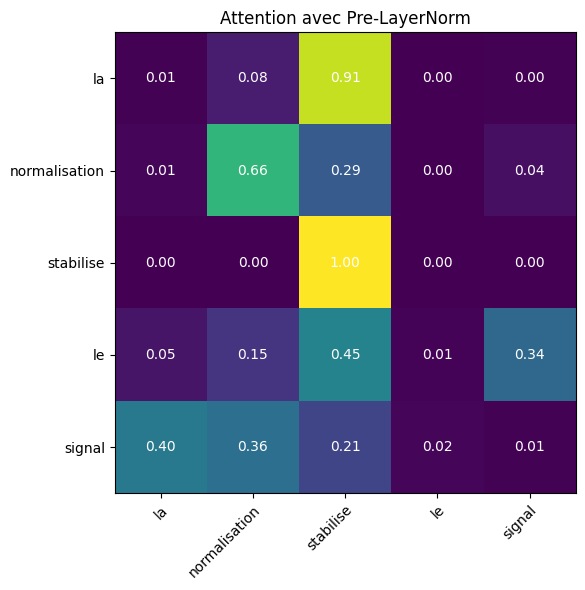

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# On réutilise notre fonction de visualisation
def plot_attention_head(attention, sentence, title=""):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(attention, cmap='viridis')
    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence)
    ax.set_yticklabels(sentence)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    for i in range(len(sentence)):
        for j in range(len(sentence)):
            ax.text(j, i, f"{attention[i, j]:.2f}", ha="center", va="center", color="w")
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

# Données d'entrée
sentence = ["la", "normalisation", "stabilise", "le", "signal"]
seq_len = len(sentence)
d_model = 16
input_sequence = tf.random.normal((seq_len, d_model))

# Couches d'attention partagées
query_layer = tf.keras.layers.Dense(d_model)
key_layer = tf.keras.layers.Dense(d_model)
value_layer = tf.keras.layers.Dense(d_model)

# 1. Post-LN (Approche originale du papier "Attention Is All You Need")
print("--- Approche Post-LN (Normalisation Après) ---")
query_post = query_layer(input_sequence)
key_post = key_layer(input_sequence)
value_post = value_layer(input_sequence)
scores_post = tf.matmul(query_post, key_post, transpose_b=True)
weights_post = tf.nn.softmax(scores_post, axis=-1)
attention_output_post = tf.matmul(weights_post, value_post)
# Connexion résiduelle puis normalisation
output_post_ln = tf.keras.layers.LayerNormalization()(input_sequence + attention_output_post)
print("Moyenne de la sortie (proche de 0) :", np.mean(output_post_ln.numpy()))
print("Variance de la sortie (proche de 1) :", np.var(output_post_ln.numpy()))


# 2. Pre-LN (Approche plus moderne et souvent plus stable)
print("\\n--- Approche Pre-LN (Normalisation Avant) ---")
normalized_input = tf.keras.layers.LayerNormalization()(input_sequence)
query_pre = query_layer(normalized_input)
key_pre = key_layer(normalized_input)
value_pre = value_layer(normalized_input)
scores_pre = tf.matmul(query_pre, key_pre, transpose_b=True)
weights_pre = tf.nn.softmax(scores_pre, axis=-1)
attention_output_pre = tf.matmul(weights_pre, value_pre)
# Connexion résiduelle (pas de normalisation à la fin)
output_pre_ln = input_sequence + attention_output_pre
plot_attention_head(weights_pre.numpy(), sentence, title="Attention avec Pre-LayerNorm")

In [11]:
# On prend la sortie de notre bloc d'attention
attention_output = output_pre_ln # Sortie de la Pre-LN

def feed_forward_network(input_tensor, activation_fn):
    """Un FFN simple avec une fonction d'activation configurable."""
    # Couche 1 : expansion de la dimension
    hidden_layer = tf.keras.layers.Dense(d_model * 4, activation=activation_fn)(input_tensor)
    # Couche 2 : retour à la dimension originale
    output_layer = tf.keras.layers.Dense(d_model)(hidden_layer)
    return output_layer

# Test avec différentes fonctions
ffn_relu = feed_forward_network(attention_output, 'relu')
ffn_leaky_relu = feed_forward_network(attention_output, tf.keras.layers.LeakyReLU(alpha=0.1))
ffn_elu = feed_forward_network(attention_output, 'elu')

print("--- Sorties du FFN ---")
print("ReLU :\\n", ffn_relu.numpy()[0, :4]) # On affiche les 4 premières dimensions
print("Leaky ReLU :\\n", ffn_leaky_relu.numpy()[0, :4])
print("ELU :\\n", ffn_elu.numpy()[0, :4])


--- Sorties du FFN ---
ReLU :\n [ 1.4063404  -0.37221748 -0.35178348  0.9997963 ]
Leaky ReLU :\n [-1.6822629   0.42398474 -0.51805955 -1.7237726 ]
ELU :\n [-1.0580838   0.29716235 -0.22230756  0.8987523 ]


Masque de padding (True = à ignorer) :\n [[False False False  True  True  True]
 [False False False False False False]]
\n--- Comparaison de l'attention pour la phrase 1 ---


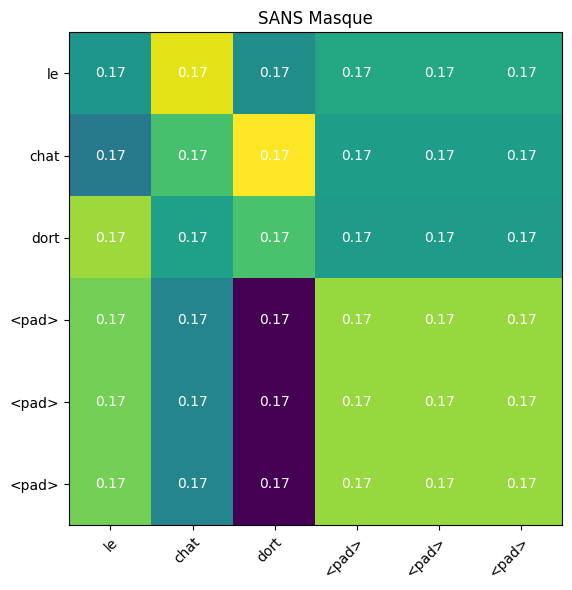

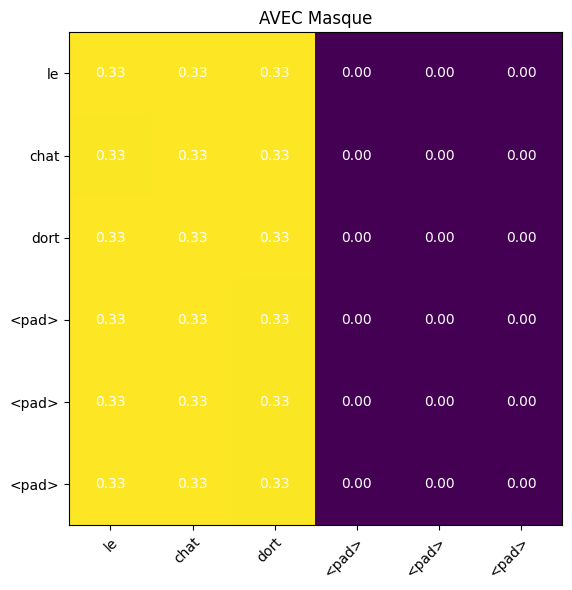

In [12]:
# --- PARTIE 3 CORRIGÉE ---

# 1. Création d'un batch avec padding
sentence_1 = ["le", "chat", "dort"]
sentence_2 = ["le", "chat", "dort", "sur", "le", "tapis"]
vocab = {"<pad>": 0, "le": 1, "chat": 2, "dort": 3, "sur": 4, "tapis": 5}
max_len = len(sentence_2)

padded_sentence_1 = sentence_1 + ["<pad>"] * (max_len - len(sentence_1))
batch_sentences = [padded_sentence_1, sentence_2]
batch_ids = [[vocab[word] for word in s] for s in batch_sentences]

# --- LA CORRECTION EST ICI ---
# Conversion de la liste Python en Tenseur TensorFlow
batch_ids_tensor = tf.constant(batch_ids)
# --- FIN DE LA CORRECTION ---

# 2. Création du masque à partir du tenseur
padding_mask = tf.math.equal(batch_ids_tensor, 0)
print("Masque de padding (True = à ignorer) :\\n", padding_mask.numpy())

# 3. Calcul de l'attention (simplifié)
d_model_mask = 8
# On utilise maintenant le tenseur
embeddings = tf.keras.layers.Embedding(len(vocab), d_model_mask)(batch_ids_tensor)

query = tf.keras.layers.Dense(d_model_mask)(embeddings)
key = tf.keras.layers.Dense(d_model_mask)(embeddings)
scores = tf.matmul(query, key, transpose_b=True)

# 4. Application du masque aux scores
mask_for_scores = tf.cast(padding_mask[:, tf.newaxis, :], dtype=tf.float32) * -1e9
masked_scores = scores + mask_for_scores
attention_weights_masked = tf.nn.softmax(masked_scores, axis=-1)

# Comparons l'attention pour la première phrase
attention_s1_no_mask = tf.nn.softmax(scores, axis=-1)[0] # Première phrase du batch
attention_s1_with_mask = attention_weights_masked[0]

print("\\n--- Comparaison de l'attention pour la phrase 1 ---")
plot_attention_head(attention_s1_no_mask.numpy(), padded_sentence_1, title="SANS Masque")
plot_attention_head(attention_s1_with_mask.numpy(), padded_sentence_1, title="AVEC Masque")

**Exo6_res**

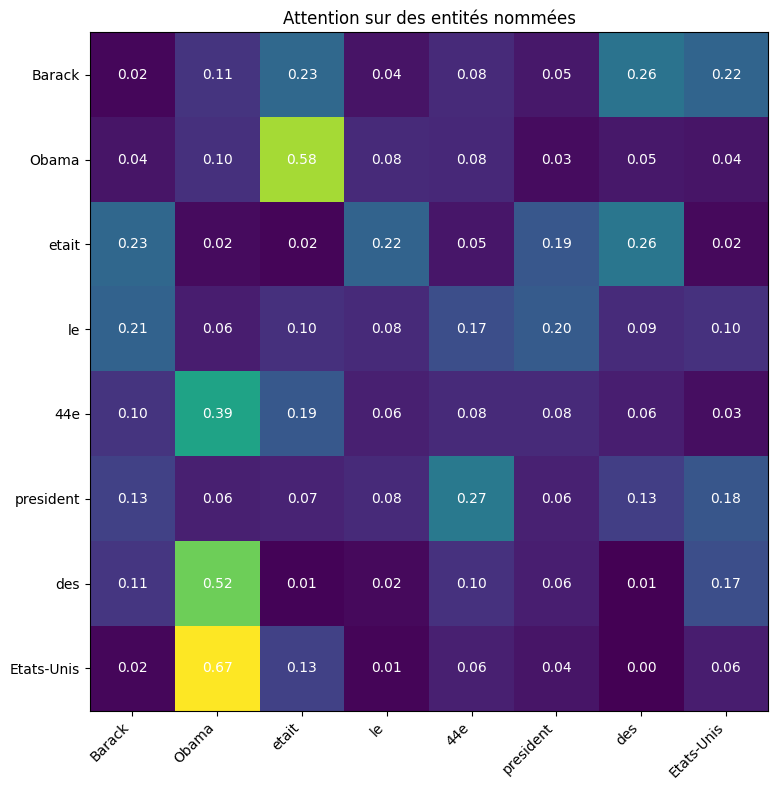

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_attention_head(attention, sentence, title=""):
    """Fonction de visualisation améliorée."""
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(attention, cmap='viridis')
    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence, rotation=45, ha="right")
    ax.set_yticklabels(sentence)
    
    for i in range(len(sentence)):
        for j in range(len(sentence)):
            ax.text(j, i, f"{attention[i, j]:.2f}", ha="center", va="center", color="w")
            
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

# 1. Phrase avec une entité nommée
sentence = ["Barack", "Obama", "etait", "le", "44e", "president", "des", "Etats-Unis"]
seq_len = len(sentence)
d_model = 32 # On augmente la dimension pour plus de capacité

# 2. Calcul de l'attention
input_sequence = tf.random.normal((seq_len, d_model))
query_layer = tf.keras.layers.Dense(d_model)
key_layer = tf.keras.layers.Dense(d_model)
value_layer = tf.keras.layers.Dense(d_model)

query = query_layer(input_sequence)
key = key_layer(input_sequence)
value = value_layer(input_sequence)

scores = tf.matmul(query, key, transpose_b=True) / tf.sqrt(tf.cast(d_model, tf.float32))
attention_weights = tf.nn.softmax(scores, axis=-1)

# 3. Visualisation
plot_attention_head(attention_weights.numpy(), sentence, "Attention sur des entités nommées")

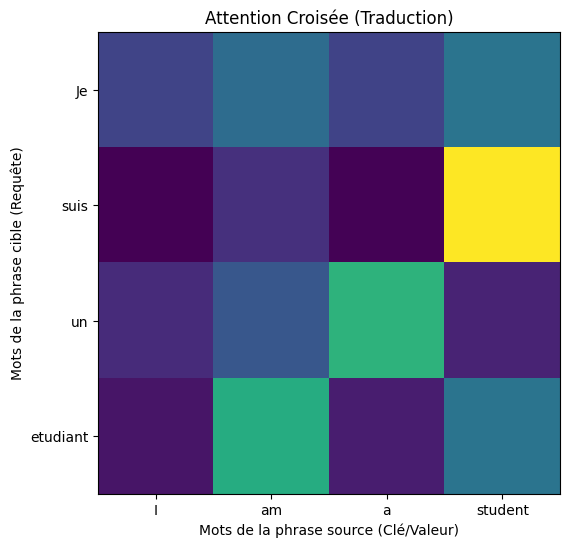

In [14]:
# 1. Séquences source (encodeur) et cible (décodeur)
encoder_sentence = ["I", "am", "a", "student"]
decoder_sentence = ["Je", "suis", "un", "etudiant"]

seq_len_enc = len(encoder_sentence)
seq_len_dec = len(decoder_sentence)
d_model = 16

# 2. Sorties simulées de l'encodeur et du décodeur
encoder_output = tf.random.normal((seq_len_enc, d_model))
decoder_output = tf.random.normal((seq_len_dec, d_model))

# 3. Mécanisme d'attention croisée
# La Requête (Query) vient du décodeur (la question : "sur quoi dois-je me concentrer ?")
# La Clé (Key) et la Valeur (Value) viennent de l'encodeur (l'information disponible)
query_cross = tf.keras.layers.Dense(d_model)(decoder_output)
key_cross = tf.keras.layers.Dense(d_model)(encoder_output)
value_cross = tf.keras.layers.Dense(d_model)(encoder_output)

scores_cross = tf.matmul(query_cross, key_cross, transpose_b=True) / tf.sqrt(tf.cast(d_model, tf.float32))
cross_attention_weights = tf.nn.softmax(scores_cross, axis=-1)

# 4. Visualisation
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(cross_attention_weights.numpy(), cmap='viridis')
ax.set_xticks(np.arange(len(encoder_sentence)))
ax.set_yticks(np.arange(len(decoder_sentence)))
ax.set_xticklabels(encoder_sentence)
ax.set_yticklabels(decoder_sentence)
ax.set_xlabel("Mots de la phrase source (Clé/Valeur)")
ax.set_ylabel("Mots de la phrase cible (Requête)")
ax.set_title("Attention Croisée (Traduction)")
plt.show()

Phrase : ['Ce', 'film', 'etait', 'absolument', 'incroyable']
Vecteur de phrase après attention :\n [ 0.55689496 -0.83349866  0.02199444 -0.40395087  0.5738928   0.02389329
  0.62124866  0.35110566 -0.03711357 -0.28664747 -0.6749345   0.18248162
 -1.3562467  -0.435354   -1.3785394  -0.23162337]
Prédiction (non entraînée) : [Négatif, Positif]\n [[0.37111443 0.62888557]]


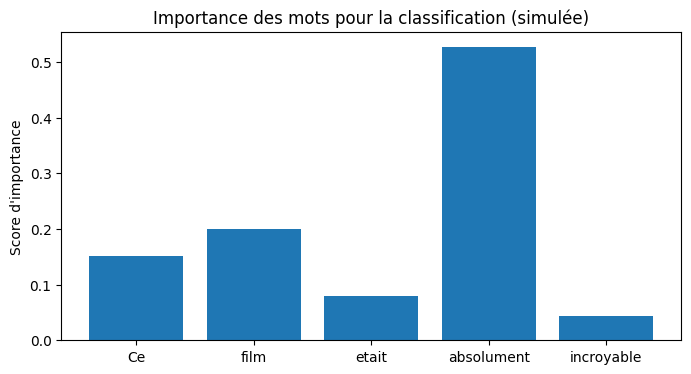

In [15]:
# 1. Phrase à classifier (par exemple, une critique de film)
sentence_clf = ["Ce", "film", "etait", "absolument", "incroyable"]
seq_len_clf = len(sentence_clf)
d_model_clf = 16

# 2. Calcul de l'auto-attention (comme d'habitude)
input_clf = tf.random.normal((seq_len_clf, d_model_clf))
query_clf = tf.keras.layers.Dense(d_model_clf)(input_clf)
key_clf = tf.keras.layers.Dense(d_model_clf)(input_clf)
value_clf = tf.keras.layers.Dense(d_model_clf)(input_clf)
scores_clf = tf.matmul(query_clf, key_clf, transpose_b=True)
weights_clf = tf.nn.softmax(scores_clf, axis=-1)
attention_output_clf = tf.matmul(weights_clf, value_clf)

# 3. Agrégation pour la classification
# On fait la moyenne des vecteurs de sortie, pondérée par leur importance
# Une méthode simple est de faire une moyenne globale (Global Average Pooling)
sentence_embedding = tf.reduce_mean(attention_output_clf, axis=0) # Shape: (d_model_clf,)

# 4. Tête de classification
# Ce vecteur est ensuite passé à un classifieur simple (ex: une couche Dense avec activation softmax)
num_classes = 2 # (Positif / Négatif)
classification_head = tf.keras.layers.Dense(num_classes, activation='softmax')
prediction = classification_head(tf.expand_dims(sentence_embedding, axis=0)) # On ajoute une dimension de batch

print("Phrase :", sentence_clf)
print("Vecteur de phrase après attention :\\n", sentence_embedding.numpy())
print("Prédiction (non entraînée) : [Négatif, Positif]\\n", prediction.numpy())

# Visualisons quels mots pourraient être jugés importants
# On peut approximer l'importance d'un mot en regardant la somme de son attention reçue
word_importance = tf.reduce_sum(weights_clf, axis=0).numpy()
word_importance = word_importance / np.sum(word_importance) # Normalisation

plt.figure(figsize=(8, 4))
plt.bar(sentence_clf, word_importance)
plt.title("Importance des mots pour la classification (simulée)")
plt.ylabel("Score d'importance")
plt.show()

**Exo7_res**

Analyse de la phrase : 'le petit chat joue avec la pelote'


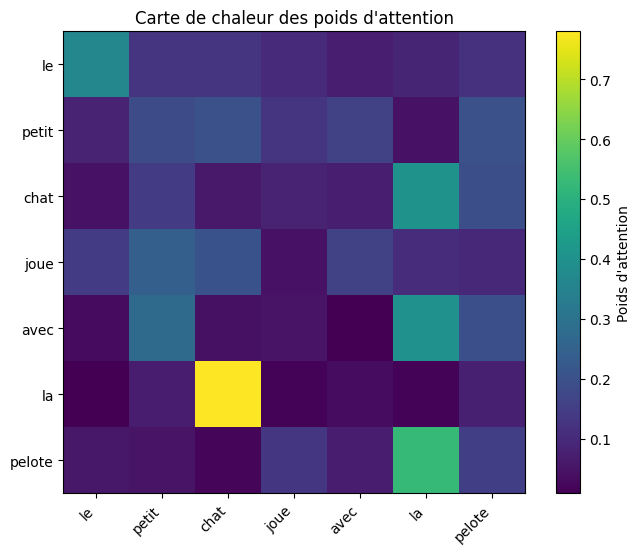

Importance (influence) de chaque mot (somme des lignes) :
- le: 1.00
- petit: 1.00
- chat: 1.00
- joue: 1.00
- avec: 1.00
- la: 1.00
- pelote: 1.00


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def calculate_and_plot_attention(sentence):
    """
    Calcule et visualise les poids d'attention pour une phrase donnée.
    
    Args:
        sentence (list): Une liste de mots (strings).
    """
    print(f"Analyse de la phrase : '{' '.join(sentence)}'")
    
    seq_len = len(sentence)
    d_model = 16 # Une dimension suffisante pour notre exemple

    # 1. Calcul de l'attention
    input_sequence = tf.random.normal((seq_len, d_model))
    query_layer = tf.keras.layers.Dense(d_model)
    key_layer = tf.keras.layers.Dense(d_model)
    
    query = query_layer(input_sequence)
    key = key_layer(input_sequence)
    
    scores = tf.matmul(query, key, transpose_b=True) / tf.sqrt(tf.cast(d_model, tf.float32))
    attention_weights = tf.nn.softmax(scores, axis=-1)

    # 2. Visualisation (Heatmap)
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(attention_weights.numpy(), cmap='viridis')

    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence, rotation=45, ha="right")
    ax.set_yticklabels(sentence)
    
    # Ajout d'une barre de couleur pour l'échelle
    fig.colorbar(im, ax=ax, label="Poids d'attention")

    ax.set_title("Carte de chaleur des poids d'attention")
    plt.show()
    
    # 3. Explication
    # L'importance d'un mot est son influence sur les autres
    # On peut l'approximer en sommant les poids d'attention qu'il émet (sa ligne)
    word_influence = tf.reduce_sum(attention_weights, axis=1).numpy()
    print("Importance (influence) de chaque mot (somme des lignes) :")
    for word, influence in zip(sentence, word_influence):
        print(f"- {word}: {influence:.2f}")

# Utilisons la fonction
sentence_to_analyze = ["le", "petit", "chat", "joue", "avec", "la", "pelote"]
calculate_and_plot_attention(sentence_to_analyze)

--- Contexte de la NATURE ---


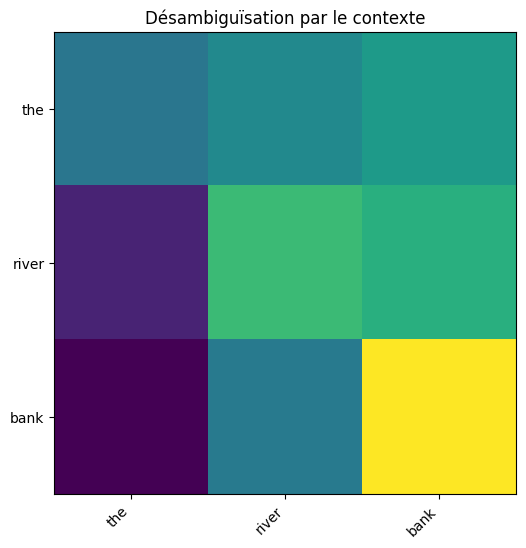

\n--- Contexte de la FINANCE ---


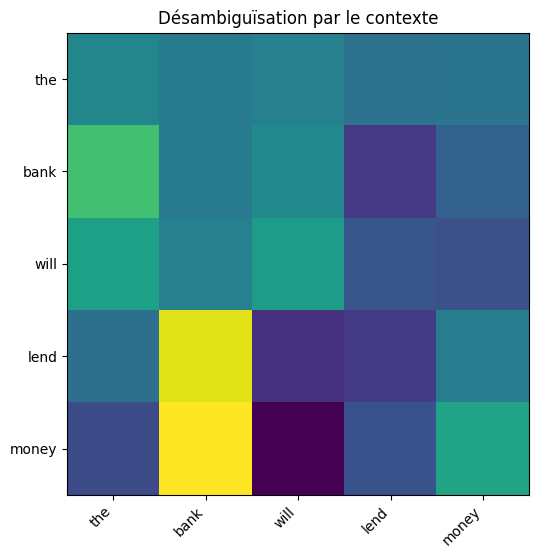

In [17]:
# On garde la même fonction de visualisation
def calculate_and_plot_attention_from_embeddings(sentence, embeddings):
    """Calcule l'attention à partir d'embeddings pré-définis."""
    seq_len = len(sentence)
    d_model = embeddings.shape[1]
    input_sequence = tf.constant(embeddings, dtype=tf.float32)
    # Le reste est identique...
    query_layer = tf.keras.layers.Dense(d_model)
    key_layer = tf.keras.layers.Dense(d_model)
    query = query_layer(input_sequence)
    key = key_layer(input_sequence)
    scores = tf.matmul(query, key, transpose_b=True) / tf.sqrt(tf.cast(d_model, tf.float32))
    attention_weights = tf.nn.softmax(scores, axis=-1)
    # Visualisation
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(attention_weights.numpy(), cmap='viridis')
    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence, rotation=45, ha="right")
    ax.set_yticklabels(sentence)
    ax.set_title("Désambiguïsation par le contexte")
    plt.show()

# Simulation d'embeddings
# Dim 0: finance, Dim 1: nature, Dim 2: verbe/action
embedding_dict = {
    "the":     np.array([0.1, 0.1, 0.1]),
    "bank":    np.array([0.9, 0.9, 0.1]), # Ambigu : forte valeur en finance ET nature
    "river":   np.array([0.1, 0.9, 0.2]), # Mot lié à la nature
    "money":   np.array([0.9, 0.1, 0.2]), # Mot lié à la finance
    "will":    np.array([0.1, 0.1, 0.8]), # Mot lié à une action future
    "lend":    np.array([0.8, 0.1, 0.9])  # Mot lié à la finance et à une action
}

# Scénario 1 : Contexte de la nature
sentence_nature = ["the", "river", "bank"]
embeddings_nature = np.array([embedding_dict[w] for w in sentence_nature])
print("--- Contexte de la NATURE ---")
calculate_and_plot_attention_from_embeddings(sentence_nature, embeddings_nature)

# Scénario 2 : Contexte de la finance
sentence_finance = ["the", "bank", "will", "lend", "money"]
embeddings_finance = np.array([embedding_dict[w] for w in sentence_finance])
print("\\n--- Contexte de la FINANCE ---")
calculate_and_plot_attention_from_embeddings(sentence_finance, embeddings_finance)

--- Démonstration Interactive : Cas 1 ---
Analyse de la phrase : 'le chasseur poursuit le lion'


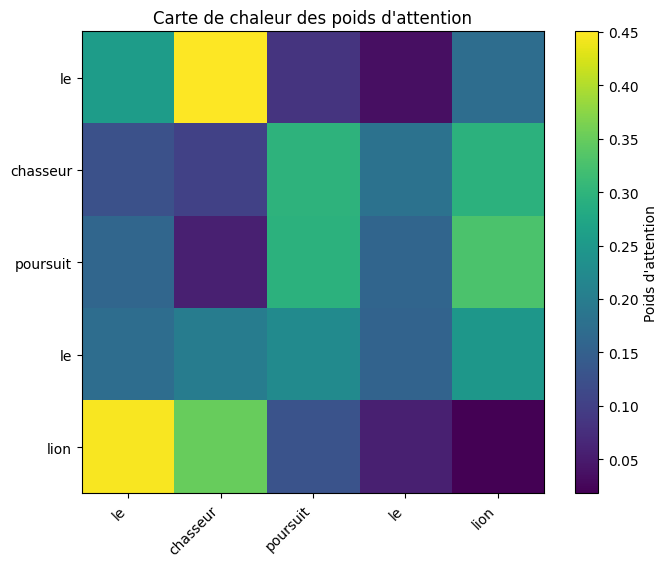

Importance (influence) de chaque mot (somme des lignes) :
- le: 1.00
- chasseur: 1.00
- poursuit: 1.00
- le: 1.00
- lion: 1.00
\n--- Démonstration Interactive : Cas 2 ---
Analyse de la phrase : 'le chasseur nourrit le lion'


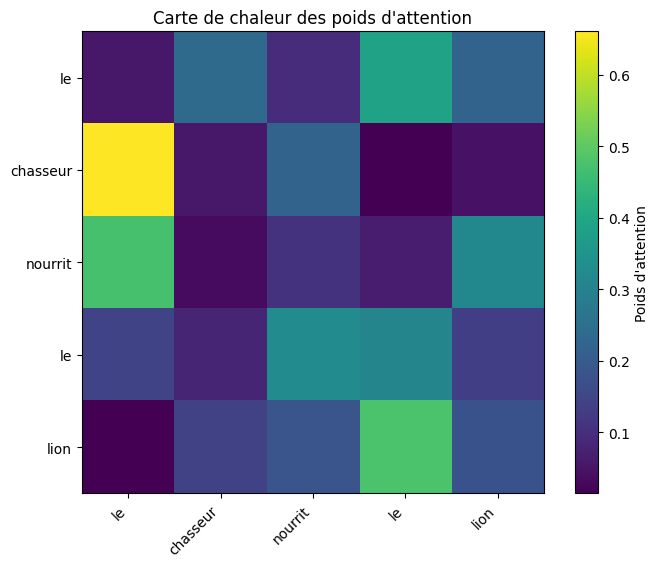

Importance (influence) de chaque mot (somme des lignes) :
- le: 1.00
- chasseur: 1.00
- nourrit: 1.00
- le: 1.00
- lion: 1.00


In [18]:
# On réutilise notre première fonction : calculate_and_plot_attention

# Imaginez que vous avez une boîte de texte où vous pouvez taper ces phrases.
# Chaque fois que vous validez, la fonction est appelée.

# Démonstration 1
print("--- Démonstration Interactive : Cas 1 ---")
interactive_sentence_1 = ["le", "chasseur", "poursuit", "le", "lion"]
calculate_and_plot_attention(interactive_sentence_1)

# Démonstration 2 : On change un mot clé
print("\\n--- Démonstration Interactive : Cas 2 ---")
interactive_sentence_2 = ["le", "chasseur", "nourrit", "le", "lion"]
calculate_and_plot_attention(interactive_sentence_2)


**Exo8_res**

Matrice des distances relatives :\n [[ 0 -1 -2 -3 -4]
 [ 1  0 -1 -2 -3]
 [ 2  1  0 -1 -2]
 [ 3  2  1  0 -1]
 [ 4  3  2  1  0]]


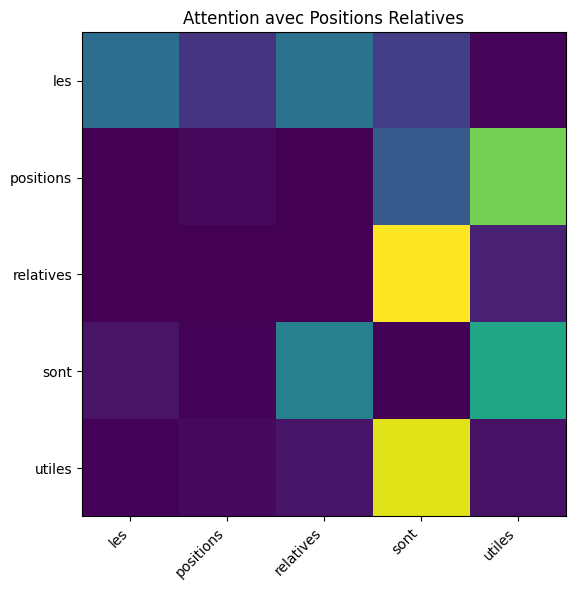

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# On garde notre fonction de visualisation
def plot_attention_head(attention, sentence, title=""):
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(attention, cmap='viridis')
    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence, rotation=45, ha="right")
    ax.set_yticklabels(sentence)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

sentence = ["les", "positions", "relatives", "sont", "utiles"]
seq_len = len(sentence)
d_model = 16

input_sequence = tf.random.normal((seq_len, d_model))
query_layer = tf.keras.layers.Dense(d_model)
key_layer = tf.keras.layers.Dense(d_model)

query = query_layer(input_sequence)
key = key_layer(input_sequence)

# Calcul des scores standard
scores = tf.matmul(query, key, transpose_b=True)

# --- Implémentation de la position relative (simplifiée) ---
# 1. On crée une matrice des distances relatives
positions = tf.range(seq_len)[:, tf.newaxis]
relative_positions_matrix = positions - tf.transpose(positions)
print("Matrice des distances relatives :\\n", relative_positions_matrix.numpy())

# 2. On crée un petit embedding pour ces distances
# On limite le nombre de positions relatives à considérer (clipping)
max_relative_positions = 5 
relative_positions_clipped = tf.clip_by_value(
    relative_positions_matrix, -max_relative_positions, max_relative_positions
)
# On décale pour avoir des indices positifs pour l'embedding
embedding_indices = relative_positions_clipped + max_relative_positions
relative_pos_embedding_layer = tf.keras.layers.Embedding(2 * max_relative_positions + 1, 1) # Output dim de 1 car c'est un biais

# 3. On ajoute le biais de position aux scores
relative_bias = tf.squeeze(relative_pos_embedding_layer(embedding_indices))
scores_with_relative_pos = scores + relative_bias
# --- Fin de l'implémentation ---

attention_weights_relative = tf.nn.softmax(scores_with_relative_pos, axis=-1)

plot_attention_head(attention_weights_relative.numpy(), sentence, "Attention avec Positions Relatives")

\n--- Attention avec Similarité Cosinus ---


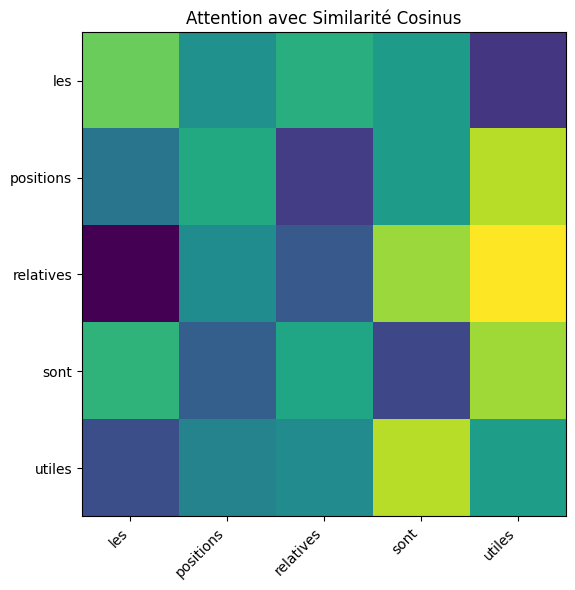

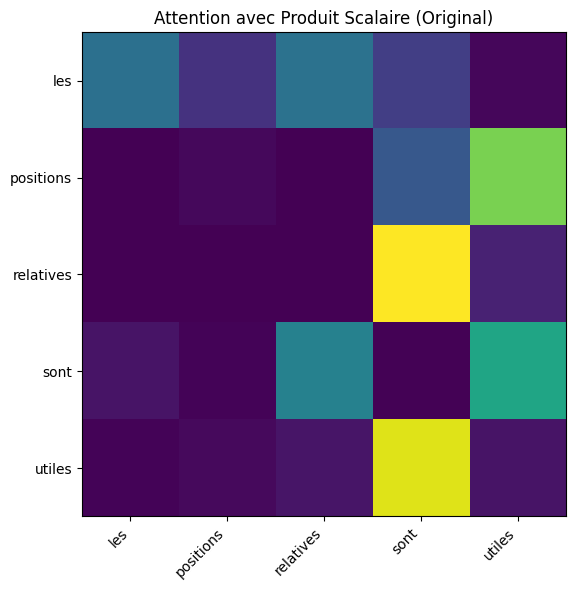

In [20]:
# On garde les mêmes Q et K que précédemment
print("\\n--- Attention avec Similarité Cosinus ---")

# 1. Calculer les normes L2 de Q et K
query_norm = tf.norm(query, axis=-1, keepdims=True)
key_norm = tf.norm(key, axis=-1, keepdims=True)

# 2. Calculer la similarité cosinus
# Le produit scalaire est déjà calculé (scores)
# On divise par le produit des normes
# tf.transpose(key_norm) pour aligner les dimensions
cosine_similarity = scores / (query_norm * tf.transpose(key_norm))

# On applique le softmax pour obtenir les poids
attention_weights_cosine = tf.nn.softmax(cosine_similarity, axis=-1)

plot_attention_head(attention_weights_cosine.numpy(), sentence, "Attention avec Similarité Cosinus")

# Pour comparer, affichons l'original avec produit scalaire
attention_weights_dot = tf.nn.softmax(scores, axis=-1)
plot_attention_head(attention_weights_dot.numpy(), sentence, "Attention avec Produit Scalaire (Original)")

\n--- Visualisation pour 1 tête(s) ---


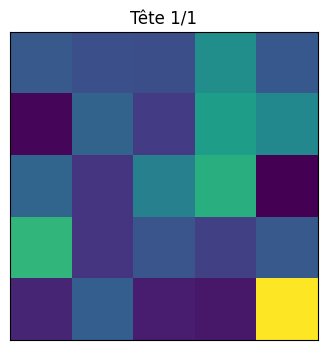

\n--- Visualisation pour 2 tête(s) ---


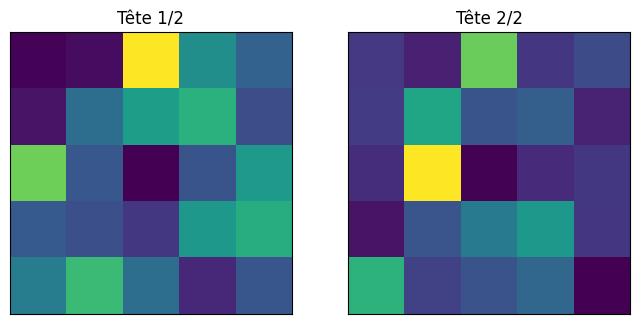

\n--- Visualisation pour 4 tête(s) ---


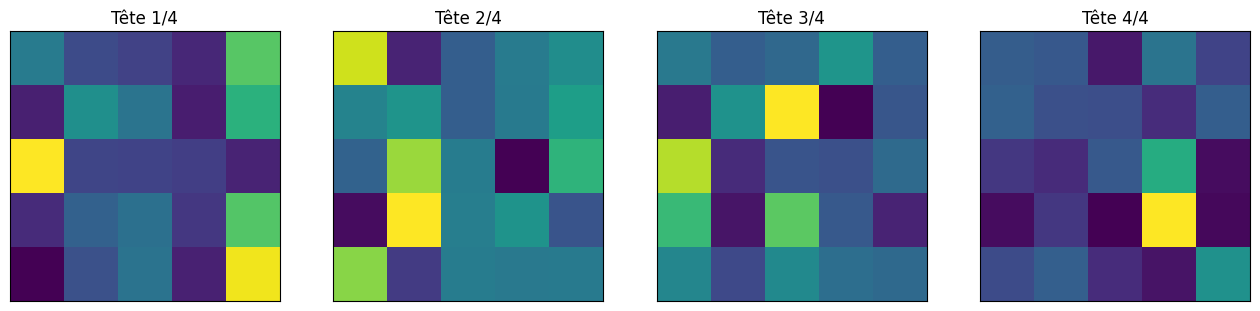

\n--- Visualisation pour 8 tête(s) ---


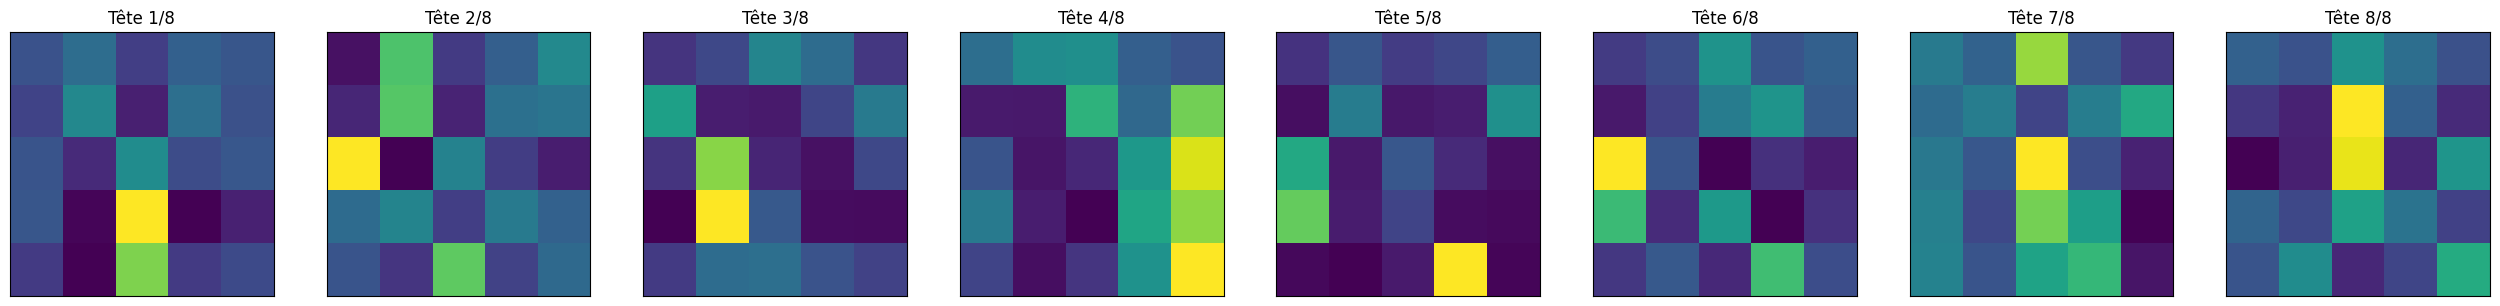

In [21]:
def compare_num_heads(sentence, d_model, num_heads_list):
    """
    Calcule et visualise l'attention pour différents nombres de têtes.
    """
    seq_len = len(sentence)
    input_sequence = tf.random.normal((seq_len, d_model))
    
    for num_heads in num_heads_list:
        if d_model % num_heads != 0:
            print(f"Impossible avec {num_heads} têtes car d_model ({d_model}) n'est pas divisible.")
            continue
            
        print(f"\\n--- Visualisation pour {num_heads} tête(s) ---")
        
        head_dim = d_model // num_heads
        
        W_q = tf.keras.layers.Dense(d_model)
        W_k = tf.keras.layers.Dense(d_model)
        
        query = W_q(input_sequence)
        key = W_k(input_sequence)

        # Séparation en têtes
        query_h = tf.transpose(tf.reshape(query, (seq_len, num_heads, head_dim)), perm=[1, 0, 2])
        key_h = tf.transpose(tf.reshape(key, (seq_len, num_heads, head_dim)), perm=[1, 0, 2])

        scores = tf.matmul(query_h, key_h, transpose_b=True) / tf.sqrt(tf.cast(head_dim, tf.float32))
        attention_weights = tf.nn.softmax(scores, axis=-1)
        
        # Visualisation de chaque tête
        fig, axes = plt.subplots(1, num_heads, figsize=(4 * num_heads, 4))
        if num_heads == 1: axes = [axes] # Rendre itérable
            
        for i, ax in enumerate(axes):
            ax.imshow(attention_weights[i].numpy(), cmap='viridis')
            ax.set_title(f"Tête {i+1}/{num_heads}")
            ax.set_xticks([])
            ax.set_yticks([])
        plt.show()

# On utilise un d_model divisible par 1, 2, 4, et 8
compare_num_heads(sentence, d_model=16, num_heads_list=[1, 2, 4, 8])

**Exo9_res**

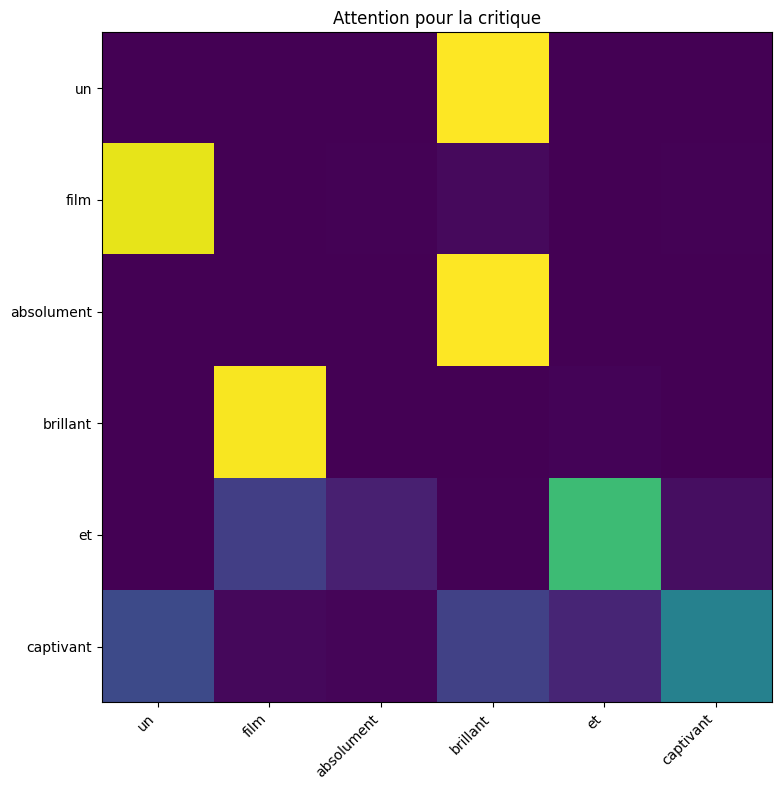

Importance des mots pour le sentiment (simulé) :
- un: 1.19
- film: 1.20
- absolument: 0.11
- brillant: 2.22
- et: 0.80
- captivant: 0.48


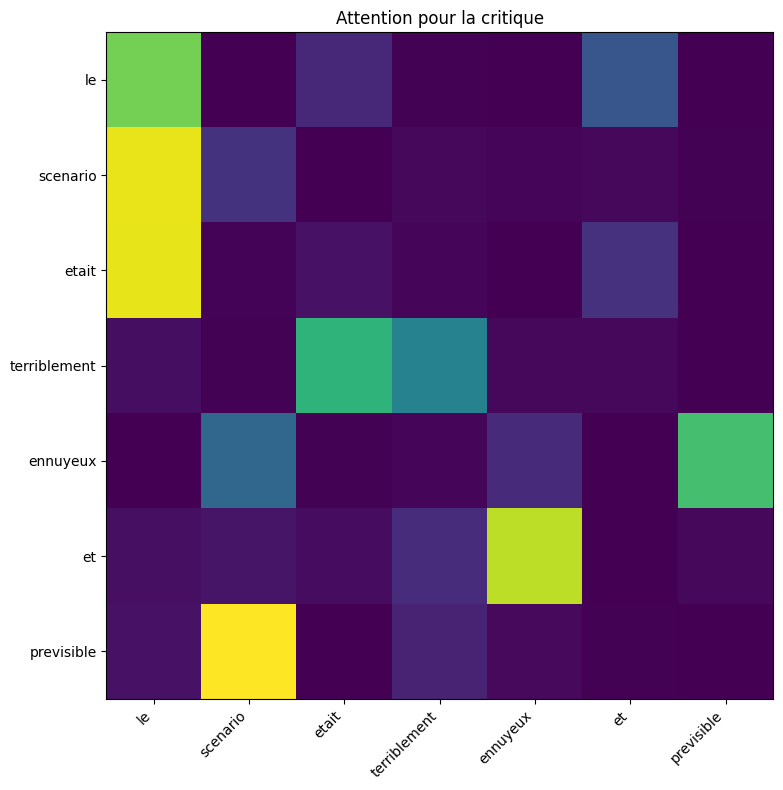

Importance des mots pour le sentiment (simulé) :
- le: 2.41
- scenario: 1.32
- etait: 0.72
- terriblement: 0.61
- ennuyeux: 0.92
- et: 0.39
- previsible: 0.63


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# On garde notre fidèle fonction de visualisation
def plot_attention_head(attention, sentence, title=""):
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(attention, cmap='viridis')
    ax.set_xticks(np.arange(len(sentence)))
    ax.set_yticks(np.arange(len(sentence)))
    ax.set_xticklabels(sentence, rotation=45, ha="right")
    ax.set_yticklabels(sentence)
    ax.set_title(title)
    fig.tight_layout()
    plt.show()

def analyze_sentiment_attention(sentence):
    """Calcule l'attention et simule l'identification des mots clés."""
    seq_len = len(sentence)
    d_model = 16
    
    input_sequence = tf.random.normal((seq_len, d_model))
    query = tf.keras.layers.Dense(d_model)(input_sequence)
    key = tf.keras.layers.Dense(d_model)(input_sequence)
    
    scores = tf.matmul(query, key, transpose_b=True)
    attention_weights = tf.nn.softmax(scores, axis=-1)
    
    plot_attention_head(attention_weights.numpy(), sentence, f"Attention pour la critique")

    # Simulation de l'importance des mots après entraînement
    # On somme l'attention reçue par chaque mot (la colonne)
    word_importance = tf.reduce_sum(attention_weights, axis=0).numpy()
    
    print("Importance des mots pour le sentiment (simulé) :")
    for word, importance in zip(sentence, word_importance):
        print(f"- {word}: {importance:.2f}")

# Cas 1 : Critique positive
review_positive = ["un", "film", "absolument", "brillant", "et", "captivant"]
analyze_sentiment_attention(review_positive)

# Cas 2 : Critique négative
review_negative = ["le", "scenario", "etait", "terriblement", "ennuyeux", "et", "previsible"]
analyze_sentiment_attention(review_negative)



In [23]:
def summarize_document(document):
    """
    Simule un résumé extractif en utilisant l'attention au niveau des phrases.
    """
    # On sépare le document en phrases
    sentences = document.split('.')
    sentences = [s.strip() for s in sentences if len(s.strip()) > 0]
    num_sentences = len(sentences)
    
    if num_sentences < 2:
        print("Le document est trop court pour être résumé.")
        return

    print("Document original :")
    for s in sentences: print(f"- {s}")
        
    # On simule un embedding pour chaque phrase (par exemple, la moyenne des embeddings de ses mots)
    d_model = 8
    sentence_embeddings = tf.random.normal((num_sentences, d_model))
    
    # Auto-attention entre les phrases
    query = tf.keras.layers.Dense(d_model)(sentence_embeddings)
    key = tf.keras.layers.Dense(d_model)(sentence_embeddings)
    scores = tf.matmul(query, key, transpose_b=True)
    attention_weights = tf.nn.softmax(scores, axis=-1)
    
    # Le score d'importance d'une phrase est la somme de l'attention qu'elle reçoit des autres
    sentence_scores = tf.reduce_sum(attention_weights, axis=0).numpy()
    
    # On sélectionne la phrase avec le score le plus élevé
    most_important_sentence_index = np.argmax(sentence_scores)
    summary = sentences[most_important_sentence_index]
    
    print(f"\\nScore d'importance de chaque phrase : {np.round(sentence_scores, 2)}")
    print(f"\\nRésumé généré : '{summary}.'")

# Un petit document de test
doc = "Les Transformers ont révolutionné le traitement du langage naturel. " \
      "Leur composant principal est le mécanisme d'attention multi-têtes. " \
      "Ce mécanisme permet au modèle de peser l'importance des différents mots dans une séquence."
      
summarize_document(doc)

Document original :
- Les Transformers ont révolutionné le traitement du langage naturel
- Leur composant principal est le mécanisme d'attention multi-têtes
- Ce mécanisme permet au modèle de peser l'importance des différents mots dans une séquence
\nScore d'importance de chaque phrase : [1.96 1.   0.04]
\nRésumé généré : 'Les Transformers ont révolutionné le traitement du langage naturel.'


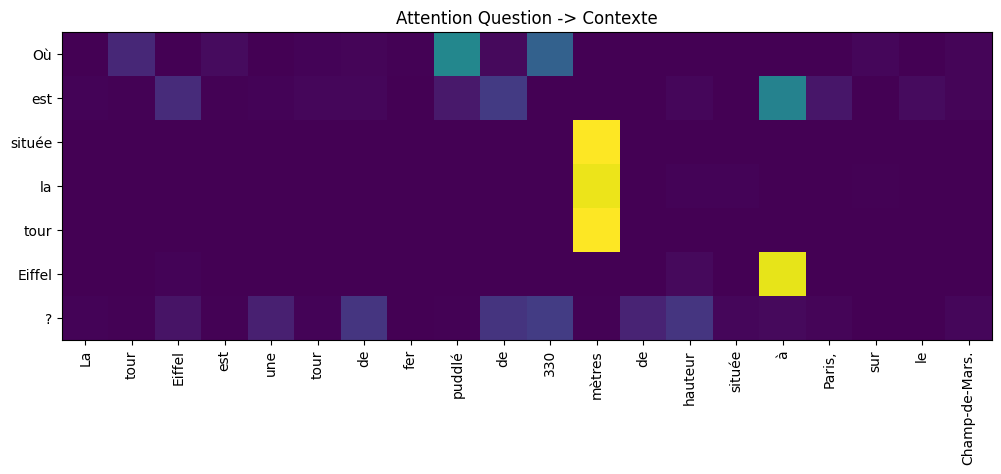

Le mot du contexte recevant le plus d'attention est : 'mètres'


In [24]:
def answer_question(context, question):
    """Simule la recherche de réponse en utilisant l'attention croisée."""
    
    context_words = context.split()
    question_words = question.split()
    
    d_model = 16
    
    # Embeddings simulés pour le contexte et la question
    context_embeddings = tf.random.normal((len(context_words), d_model))
    question_embeddings = tf.random.normal((len(question_words), d_model))
    
    # --- Attention Croisée ---
    # La Requête (Query) vient de la question (ce que l'on cherche)
    # La Clé (Key) et la Valeur (Value) viennent du contexte (où l'on cherche)
    query = tf.keras.layers.Dense(d_model)(question_embeddings)
    key = tf.keras.layers.Dense(d_model)(context_embeddings)
    
    scores = tf.matmul(query, key, transpose_b=True)
    attention_weights = tf.nn.softmax(scores, axis=-1)
    
    # On visualise l'attention du point de vue de la question
    fig, ax = plt.subplots(figsize=(12, 4))
    im = ax.imshow(attention_weights.numpy(), cmap='viridis', aspect='auto')
    ax.set_xticks(np.arange(len(context_words)))
    ax.set_yticks(np.arange(len(question_words)))
    ax.set_xticklabels(context_words, rotation=90)
    ax.set_yticklabels(question_words)
    ax.set_title("Attention Question -> Contexte")
    plt.show()
    
    # Pour trouver la réponse, on identifie les mots du contexte qui reçoivent le plus d'attention
    # On somme l'attention reçue par chaque mot du contexte
    context_word_scores = tf.reduce_sum(attention_weights, axis=0).numpy()
    
    # On pourrait extraire les N mots avec les meilleurs scores
    start_index = np.argmax(context_word_scores)
    # Dans un vrai modèle, on prédirait un début et une fin de "span" (segment)
    print(f"Le mot du contexte recevant le plus d'attention est : '{context_words[start_index]}'")


context_paragraph = "La tour Eiffel est une tour de fer puddlé de 330 mètres de hauteur située à Paris, sur le Champ-de-Mars."
user_question = "Où est située la tour Eiffel ?"

answer_question(context_paragraph, user_question)